#Heading
#steps
- 1.Reading and understanding the data
-2.Handling missing values and further cleaning the data
    - 1.Null values in recharge related columns
    - 2.Misisng values in categorical columns
    - 3.Setting missing threshold as .7 and dropping columns with Na ratio above threshold
    - 4.Missing values in id columns
    - 5.Missing values in numeric columns
    - 6.Date columns
    - 7.Columns with just one unique value
    - 8.Renaming volume based cost columns¶
- 3. Deriving new features
- 4. Filtering high value customers
    - 1.Deriving new features required for Filtering high value customers
    - 2.Filtering high value customers
- 5.Tagging churners and removing attributes of the churn phase
- 6.EDA
    - 1. Univariate and Bivariate analysis
- 7.Building the models
    - Train_test split
    - Feature scaling
    - first training model
    - Logistic regression model using rfe selected features
    - Multiple logistic regression models
    - PCA
    - Logistic model with pricipal components
    - Random forest model
    - Random forest model with tuned hyperparameters
- 8.Conculsions and recommendations
    
    
    
    

In [1]:
# importing libraries
import numpy as np,pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import statsmodels
import statsmodels.api as sm
import sklearn

In [3]:
# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')


## 1.Reading and understanding the data

In [4]:
# storing data to df
df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
#seting maximum number of displayed columns and rows as 500
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [6]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [7]:
#shape of df
df.shape

(99999, 226)

-  There are 99999 rows and 226columns in the data set

In [8]:
# dropping duplicate rows
df.drop_duplicates(inplace = True)
df.shape

(99999, 226)

- Since the shape of df before and after dropping duplicates are the same, we could say that there are no duplicate rows in df

In [9]:
 #describing numerical columns
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [10]:
# checking data types of columns
df.info(verbose =1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

## 2. Handling missing values and further cleaning the data

In [11]:
# Checking for null values
df.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

- There are multiple columns with missing values, so let's check the null value percentage in each column.

In [12]:
# Checking the null value percentage and sorting the columns based on their null percentage
(100*df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

arpu_3g_6                   74.846748
night_pck_user_6            74.846748
total_rech_data_6           74.846748
arpu_2g_6                   74.846748
max_rech_data_6             74.846748
fb_user_6                   74.846748
av_rech_amt_data_6          74.846748
date_of_last_rech_data_6    74.846748
count_rech_2g_6             74.846748
count_rech_3g_6             74.846748
date_of_last_rech_data_7    74.428744
total_rech_data_7           74.428744
fb_user_7                   74.428744
max_rech_data_7             74.428744
night_pck_user_7            74.428744
count_rech_2g_7             74.428744
av_rech_amt_data_7          74.428744
arpu_2g_7                   74.428744
count_rech_3g_7             74.428744
arpu_3g_7                   74.428744
total_rech_data_9           74.077741
count_rech_3g_9             74.077741
fb_user_9                   74.077741
max_rech_data_9             74.077741
arpu_3g_9                   74.077741
date_of_last_rech_data_9    74.077741
night_pck_us

- In order to filter the high value customers, we need to first caluculate the average recharge done by customer in June and July. ( (total recharge amount for june(6) +total recharge amount for july(7))/ 2 )
- Total recharge amount for a month = call recharge amount + data recharge amount`

- So it is better to extract all the columns that are related to recharging and then to  have a closer look at them.

#### <font color ='green'>Handling missing values in recharge related columns

In [13]:
# columns related to recharging

recharge_cols = ['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9',
                 'max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','max_rech_amt_9',
                 'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
                 'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9',
                 'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9',
                'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9',
                'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8',
                 'date_of_last_rech_data_9']

In [14]:
#having a look at null percentage of these columns(recharge_columns)
100*df[recharge_cols].isnull().sum()/len(df)

total_rech_amt_6             0.000000
total_rech_amt_7             0.000000
total_rech_amt_8             0.000000
total_rech_amt_9             0.000000
max_rech_amt_6               0.000000
max_rech_amt_7               0.000000
max_rech_amt_8               0.000000
max_rech_amt_9               0.000000
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
date_of_last_rech_6          1.607016
date_of_last_rech_7          1.767018
date_of_last_rech_8          3.622036
date_of_last_rech_9          4.760048
date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last

- null percentage values of total_rech_data,max_rech_data,av_rech_amt_data etc are same for same months.
- So now it is possible that the same rows are  having null values for these different columns (ie,misssing together).
- let's check this for one month.

In [15]:
# let's check howmany null values are there for max_rech_data and av_rech_amt_data for the 6th month, 
# in a dataset where all the entries of total_rech_data_6 column are null.
df[df.total_rech_data_6.isna()][['total_rech_data_6','max_rech_data_6','av_rech_amt_data_6',
                                 'date_of_last_rech_data_6']].isnull().sum()

total_rech_data_6           74846
max_rech_data_6             74846
av_rech_amt_data_6          74846
date_of_last_rech_data_6    74846
dtype: int64

- The number of null values is same across different columns even when considered  only those entries where the total_rech_data_6 are null.
- indicating that same 74846 rows have null values across total_rech_data_6,max_rech_data_6 and av_rech_amt_data_6
- These customers have not recharged and that is why we have null values in these columns

In [16]:
# descibing the rechage columns
df[recharge_cols].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


- Also the minimum value in these recharge amount columns is 1 which implies that these missing values are indeed the ones who have not recharged, so let's impute the missing values with 0 as they have not recharged

In [17]:
# creating a list of column names where we want to impute the missing values with 0
imp_list = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
           'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9',
           'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']

In [18]:
#filling missing values with 0

df[imp_list] = df[imp_list].apply(lambda x: x.fillna(0))

In [19]:
# checking if all the missing values have been replaced in these columns.
100*df[imp_list].isnull().sum()/len(df)

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
dtype: float64

#### <font color = 'green'>Misisng values in categorical columns

In [20]:
#categorical columns in the data set
cat_cols=['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6', 'fb_user_7','fb_user_8' ,'fb_user_9']

- We can impute the missing values in categorical columns with -1

In [21]:
# looking at the proportion of categories in night_pck_user columns
print(df['night_pck_user_6'].value_counts(dropna=False,normalize = True),
df['night_pck_user_7'].value_counts(dropna=False,normalize = True),
df['night_pck_user_8'].value_counts(dropna=False,normalize = True),
df['night_pck_user_9'].value_counts(dropna=False,normalize = True))

NaN    0.748467
0.0    0.245222
1.0    0.006310
Name: night_pck_user_6, dtype: float64 NaN    0.744287
0.0    0.249822
1.0    0.005890
Name: night_pck_user_7, dtype: float64 NaN    0.736607
0.0    0.257903
1.0    0.005490
Name: night_pck_user_8, dtype: float64 NaN    0.740777
0.0    0.255083
1.0    0.004140
Name: night_pck_user_9, dtype: float64


In [22]:
# looking at the proportion of categories in fb_user columns
print(df['fb_user_6'].value_counts(dropna=False,normalize = True),
df['fb_user_7'].value_counts(dropna=False,normalize = True),
df['fb_user_8'].value_counts(dropna=False,normalize = True),
df['fb_user_9'].value_counts(dropna=False,normalize = True))

NaN    0.748467
1.0    0.230002
0.0    0.021530
Name: fb_user_6, dtype: float64 NaN    0.744287
1.0    0.232382
0.0    0.023330
Name: fb_user_7, dtype: float64 NaN    0.736607
1.0    0.234632
0.0    0.028760
Name: fb_user_8, dtype: float64 NaN    0.740777
1.0    0.223182
0.0    0.036040
Name: fb_user_9, dtype: float64


- Once we looked at the proportion of categories in these categorical columns, it is evident that above 70% of the values are missing. (mode is NA)
- So we do not think there is any point in replacing the missing values with -1
- so we are dropping these categorical columns from the original data set

In [23]:
df.drop(cat_cols,axis=1,inplace=True)

#### <font color = 'green'>Dropping  columns with missing ratio > 0.7

In [24]:
df.shape

(99999, 218)

In [25]:
#list of column names which has missing threshold ratio above 0.7
above_threshold =[i for i in df.columns if (df[i].isnull().sum()/df.shape[0])>0.7]
above_threshold 

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9']

In [26]:
# dropping columns having missing value percentage above 70%
df.drop(above_threshold,axis=1,inplace=True)

In [27]:
df.shape

(99999, 198)

#### Missing values in id columns

- circle_id is the only id column in df


In [28]:
df.circle_id.isnull().sum()

0

- There are no missing values in circle_id

In [29]:
df.circle_id.value_counts()

109    99999
Name: circle_id, dtype: int64

- The circle_id is same for the entire rows
- So there is no point in having this column as it will not add any information to our analysis
- So let's remove this column

In [30]:
df.drop('circle_id',axis=1,inplace=True)

In [31]:
df.shape

(99999, 197)

#### <font color = 'green'> Missing values in numeric columns

In [32]:
#creating a list of numerical columns
num_cols = df.select_dtypes('number').columns

In [33]:
# checking howmany numerical columns are there in the dataframe
len(num_cols)

189

- Let's have a look at the described values of numerical columns
- If values are increasing proportionally from minimum value to maximum value through 25th percentile, median and 75th percentile, then we could say the distribution is symmetric and therefore we can replace the missing values with mean
- Also if the distribution is symmetric the mean and median values would be almost same
- If the data is skewed we can impute the missing values with median

In [34]:
df[num_cols].describe()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,9

- We could see that most of the numerical data are skewed as their median and mean are not same and the values are not proportionally increasing over equal intervals.
- So let's replace the missing values in numerical columns with their median

In [35]:
# replacing the missing values with median
df[num_cols] = df[num_cols].apply(lambda x : x.fillna(x.median()))

#### <font color = 'green'> Date columns

In [36]:
date_col = df.select_dtypes('object').columns
date_col

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9'],
      dtype='object')

In [37]:
df.shape

(99999, 197)

In [38]:
# removing date columns from df.
df.drop(date_col,axis=1,inplace=True)

In [39]:
df.shape

(99999, 189)

In [40]:
# checking missing value percentage again
100*(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

mobile_number         0.0
ic_others_8           0.0
spl_ic_mou_7          0.0
spl_ic_mou_8          0.0
spl_ic_mou_9          0.0
isd_ic_mou_6          0.0
isd_ic_mou_7          0.0
isd_ic_mou_8          0.0
isd_ic_mou_9          0.0
ic_others_6           0.0
ic_others_7           0.0
ic_others_9           0.0
total_ic_mou_9        0.0
total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_num_9      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
total_rech_amt_9      0.0
max_rech_amt_6        0.0
spl_ic_mou_6          0.0
total_ic_mou_8        0.0
loc_ic_mou_9          0.0
std_ic_t2f_mou_8      0.0
std_ic_t2t_mou_7      0.0
std_ic_t2t_mou_8      0.0
std_ic_t2t_mou_9      0.0
std_ic_t2m_mou_6      0.0
std_ic_t2m_mou_7      0.0
std_ic_t2m_mou_8      0.0
std_ic_t2m_mou_9      0.0
std_ic_t2f_mou_6      0.0
std_ic_t2f_mou_7      0.0
std_ic_t2f_mou_9      0.0
total_ic_mou_7        0.0
std_ic_t2o_mou_6      0.0
std_ic_t2o_m

- All the missing values have been handled

#### <font color = 'green'> Columns with single value

In [41]:
# creating a list of columns which has only one unique value in it.
drop_list =[i for i in df.columns if df[i].nunique() == 1]
drop_list

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

- Let's remove these columns which have same values for all the rows, as they will not be useful in our analysis

In [42]:
# removing unwanted columns 
df.drop(drop_list,axis= 1,inplace = True)

In [43]:
df.shape

(99999, 178)

#### <font color = 'green'>  Renaming volume based cost columns

In [44]:
#checking vbc columns
[i for i in df.columns if 'vbc' in i]

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']

In [45]:
# we can remove 'sep_vbc_3g' as it is associated with 9th month

In [46]:
df.drop('sep_vbc_3g',axis=1,inplace=True)

In [47]:
# let's convert the month labels to number format(ie,6,7 and 8)

In [48]:
df.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':"vbc_3g_8"},inplace=True)

In [49]:
#checking vbc columns again
[i for i in df.columns if 'vbc' in i]

['vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6']

<font color ='green'> Mobile number

- Mobile number is different for every customer
- so it doesn't add any value to the model we build so removing mobile number from df

In [50]:
df.drop('mobile_number',1,inplace=True)

## 3. Deriving new features 

In [51]:
# Total average revenue per user (for good phase and action phase)
df['total_arpu'] = df.arpu_6+df.arpu_7+df.arpu_8

In [52]:
# total 3g usage (for good phase and action phase)
df['total_vol_3g']  = df.vol_3g_mb_6+ df.vol_3g_mb_7+ df.vol_3g_mb_8

- We have derived 2 new features and we will derive few more while filtering high value customers

## 4.Filtering high value customers

- In this project we will be considering only high-value customers for the churn prediction
- In this project high value customer is a customer who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

- In order to filter the high value customers, we need to first caluculate the average recharge done by customer in June and July. ( (total recharge amount for june(6) +total recharge amount for july(7))/ 2 )
- Total recharge amount for a month = call recharge amount + data recharge amount

#### Deriving new features

In [53]:
#### Calculating average recharge amount in the first two months 

average recharge amount in the first two months= (total recharge amount for june(6) +total recharge amount for july(7))/ 2 )

- total recharge amount for june = call recharge amount for june + data recharge amount for june (ie,total_rech_amt_6 + total_data_rech_6)

- total recharge amount for july = call recharge amount for july + data recharge amount for july(ie,total_rech_amt_7 + total_data_rech_7)

- we have 
    - total_rech_amt_6 
    - total_rech_amt_7
- we need to derive
    - total_data_rech_6
    - total_data_rech_7

In [54]:
# calculating the total data recharge amount for June and july
#ie, number of recharges * average recharge amount

df['total_data_rech_amt_6'] = df.total_rech_data_6 * df.av_rech_amt_data_6
df['total_data_rech_amt_7'] = df.total_rech_data_7 * df.av_rech_amt_data_7

In [55]:
# total data recharge amount for aug
df['total_data_rech_amt_8'] = df.total_rech_data_8 * df.av_rech_amt_data_8

In [56]:
# calculating average recharge amount for june and july
df['av_amt_6&7'] = ((df.total_rech_amt_6 + df.total_data_rech_amt_6) +(df.total_rech_amt_7 + df.total_data_rech_amt_7) )/2

#### Filtering high value customers

- In this project high value customer is a customer who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [57]:
# calculating 70th percentile of average recharge amount in june and july
df['av_amt_6&7'].quantile(.7)

478.0

- The 70th percentile of average recharge amount in june and july is 478

In [58]:
df.shape

(99999, 182)

In [59]:
df[df['av_amt_6&7']>478].shape

(29953, 182)

In [60]:
#filtering high value customers
df= df[df['av_amt_6&7']>=478]

In [61]:
df.shape

(30001, 182)

- df shape before filtering high value customers -> (99999, 182)
- The 70th percentile of average recharge amount in june and july is `478`
- There are `29953` entries with average recharge amount in june and july above 478
- But high value customers are customers who have recharged with an amount more than or equal to 478
- So  after filtering high value customers the shape of df becomes-> `(30001, 182)`

## 5.Tagging churners and removing attributes of the churn phase

- A churned customer is  a customer who  have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.
- Here  the fourth month is the ‘churn’ phase.

The attributes ywe will use to tag churners are:

    total_ic_mou_9

    total_og_mou_9

    vol_2g_mb_9

    vol_3g_mb_9

In [62]:
# let's have a look at these 4 attributes
df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  30001 non-null  float64
 1   total_og_mou_9  30001 non-null  float64
 2   vol_2g_mb_9     30001 non-null  float64
 3   vol_3g_mb_9     30001 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB


- Let's first create a column 'churn' with value as '0' for all the entries
- Then let's change the value to 1 for those customers who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

In [63]:
#creating a churn column with all values as zero
df['churn'] = 0

In [64]:
# conditions for churning
is_churn = (df.total_ic_mou_9==0)&(df.total_og_mou_9==0)&(df.vol_2g_mb_9==0)&(df.vol_3g_mb_9==0)

In [65]:
df[is_churn].shape

(2441, 183)

In [66]:
# There are 2441 customers who have churned
# let's change their churn value to 1

In [67]:
df.loc[is_churn,'churn']  =1

In [68]:
#let's have a look at the proportion of churned and non churned customers
df.churn.value_counts(normalize=True)

0    0.918636
1    0.081364
Name: churn, dtype: float64

- 8.1 percent of customers have churned

<AxesSubplot:ylabel='churn'>

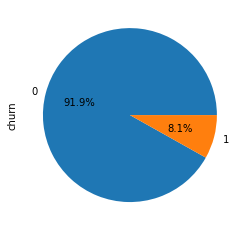

In [69]:
#plotting proportion of churned customers in dataset
df.churn.value_counts(normalize=True).plot.pie(autopct='%.1f%%')


- Only a  small fraction (8.1%) customers have churned.
- So there  is a class imbalance.
- We will handle this class imbalance with the help of SMOTE while building the model


- Now let's remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [70]:
# creating a list of column names corresponding to churn phase
churn_phase = [i for i in df.columns if '_9' in i]
print(churn_phase)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [71]:
len(churn_phase)

43

- There are 43 columns of 9th month
- let's remove them

In [72]:
# shape before removing
df.shape

(30001, 183)

In [73]:
# removing churn phase columns
df.drop(churn_phase,axis=1,inplace=True)

In [74]:
# shape after removing churn phase columns
df.shape

(30001, 140)

## 6. EDA

#### Univariate and Bivariate analysis

<font color ='green'> total average revenue generated per user over 6-8 months

<AxesSubplot:ylabel='total_arpu'>

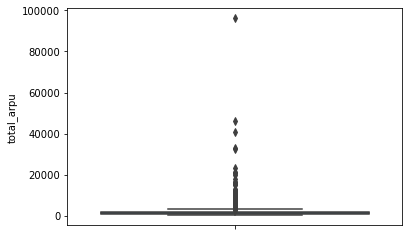

In [75]:
#boxplot of total_arpu
sns.boxplot(y = df['total_arpu'] )

- There is a data point which is way too higher than the other values,because of which the box is not completely visible
- So let's have a look at that one entry with maximum value to see if that was an incorrect entry.

In [76]:
df[df.total_arpu>80000]

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_arpu,total_vol_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,av_amt_6&7,churn
38610,27731.088,35145.834,33543.624,5.69,5.14,7.01,3231.81,3868.59,3625.43,0.0,0.0,0.0,0.0,0.0,0.0,5.69,5.14,7.01,2.51,0.4,8.29,0.0,0.0,0.0,0.0,0.0,0.0,8.21,5.54,15.31,0.0,0.0,0.0,0.0,0.18,0.0,0.0,0.0,0.0,0.0,0.18,0.0,3229.29,3868.01,3629.91,0.0,0.0,0.0,0.0,0.0,0.0,3237.51,3873.74,3645.23,6.93,13.73,14.76,4.56,2.78,10.81,0.0,0.0,1.43,11.49,16.51,27.01,2.28,0.0,0.0,0.0,0.0,5.06,0.0,0.0,0.0,2.28,0.0,5.06,551.04,525.71,596.03,0.13,0.06,0.0,536.99,504.01,556.74,0.13,5.11,7.19,29,17,19,35190,40335,45320,3100,3100,3100,3100,3100,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,460,0.0,0.0,0.0,96420.546,0.0,0.0,0.0,0.0,37762.5,0


- From this data it is evident that this customer has very higher minutes of usage values and recharge amount values
- This is not an invalid data point, it is just that this particular customer is a heavy user of the services
- so we do not have to remove this data point

- Now inorder to see the box clearly let's keep showfliers as False (removing extreme points)

<AxesSubplot:ylabel='total_arpu'>

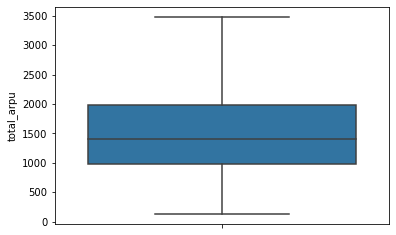

In [77]:
sns.boxplot(y = df['total_arpu'],showfliers=False )

In [78]:
df['total_arpu'].describe()

count    30001.000000
mean      1627.870984
std       1280.839485
min        121.602000
25%        977.222000
50%       1409.314000
75%       1979.890000
max      96420.546000
Name: total_arpu, dtype: float64

- The average of total revenue generated per user is 1627.870984
- Median of total_arpu is 1409.314000

<font color='green'>  total 3g usage (for good phase and action phase)

<AxesSubplot:xlabel='total_vol_3g'>

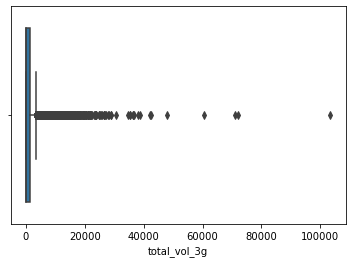

In [79]:
#boxplot of total_vol_3g
sns.boxplot(df['total_vol_3g'])

- Let's have a look at the extreme data point

In [80]:
df[df.total_vol_3g>100000]

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_arpu,total_vol_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,av_amt_6&7,churn
27531,5034.04,3711.661,3459.269,0.0,32.33,0.0,1.73,91.735,10.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.61,0.0,0.0,40.43,0.53,0.0,0.0,0.0,1.73,0.0,8.51,0.0,63.685,0.53,0.0,0.0,0.0,0.0,3.635,0.0,0.0,0.0,0.0,0.0,11.09,0.0,0.0,0.0,0.0,1.73,0.0,9.66,0.0,0.0,0.0,1.73,0.0,10.19,0.0,15.74,0.0,0.0,57.08,0.0,0.0,0.93,0.0,0.0,92.55,0.0,0.0,0.0,0.0,0.0,2.04,0.0,0.0,0.0,0.0,0.0,5.96,0.0,0.03,0.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5,5,5920,4365,4091,1555,1555,1555,1555,1555,1555,4.0,3.0,3.0,1555.0,1555.0,1555.0,5920.0,4365.0,4061.0,0.01,0.12,0.14,45735.4,27600.29,30036.06,0,0,0,0,0,0,4,3,3,0,0,0,222,3428.44,679.77,2337.46,12204.97,103371.75,23680.0,13095.0,12183.0,23530.0,0


- This particular customer is a heavy user of 3g services, and this is not an invalid data point
- So let's not remove these extreme values from data set, instead let's keep showfliers as False while plotting boxplot.

<AxesSubplot:ylabel='total_vol_3g'>

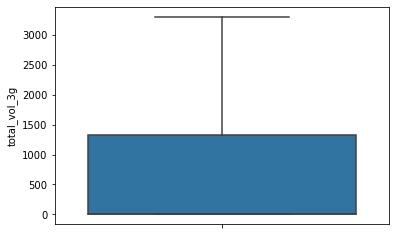

In [81]:
sns.boxplot(y = df['total_vol_3g'],showfliers=False )

In [82]:
 df['total_vol_3g'].describe()

count     30001.000000
mean       1065.949267
std        2446.695503
min           0.000000
25%           0.000000
50%           0.000000
75%        1321.740000
max      103371.750000
Name: total_vol_3g, dtype: float64

- Around 50% of the customers do not use the 3g services, because of which the median value is 0.
- Average of total 3g volume used by customers is 1065.949267

- We see that there a few customers with very extreme values(but not invalid) in the data set.
- So from now on let's keep the showfliers as False while plotting boxplots to better understand the data

<font color='green'> Defining a function for automating the process of creating boxplots for different months

In [83]:
def boxplotss(column_name):
    plt.figure(figsize=[18,12])
    plt.title(column_name+' VS Churn')
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y =column_name + '_6',x =df.churn,hue =df.churn,showfliers=False)
    plt.legend(loc='upper center')
    plt.title(column_name+'_6 VS Churn')
    
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y =column_name + '_7',x =df.churn,hue =df.churn,showfliers=False)
    plt.legend(loc='upper center')
    plt.title(column_name+'_7 VS Churn')
  
    
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y =column_name + '_8',x =df.churn,hue =df.churn,showfliers=False)
    plt.legend(loc='upper center')
    plt.title(column_name+'_8 VS Churn')
    
    plt.show()

<font color ='Green'>Columns associated with recharge amount 

In [84]:
rech_amt =[i for i in df.columns if 'amt' in i]
print(rech_amt)

['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'total_data_rech_amt_6', 'total_data_rech_amt_7', 'total_data_rech_amt_8', 'av_amt_6&7']


<font color= 'Green'> Total_rech_amt columns

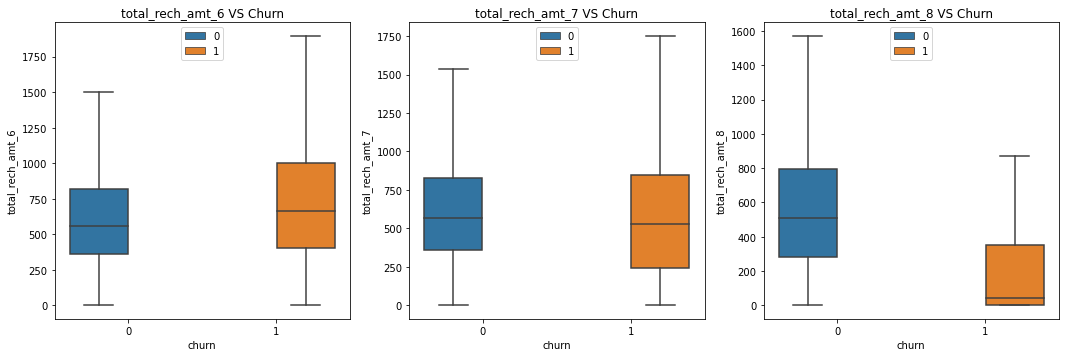

In [85]:
# boxplots of  Total_rech_amt columns
boxplotss('total_rech_amt')

- There is a drop in the total amount recharched by churned customers in the 8th month(action phase)
- The median of total amount recharched by customers who have not churned remains nearly same for all the months

<font color = 'green'> total_data_rech_amt Columns

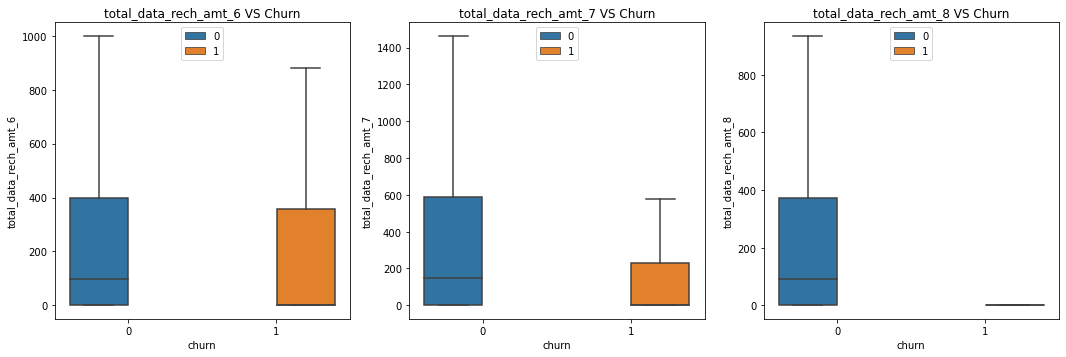

In [86]:
# boxplots of total_data_rech_amt columns
boxplotss('total_data_rech_amt')

- Churned customers have made nearly zero data recharge  in the 8th month
- 75th percentile and maximum values of total_data_rech_amt decreases over 6-8 month period
- boxplots of total_data_rech_amt  for customer who have not churned remains nearly same across months

<font color='green'> max_rech_amt columns

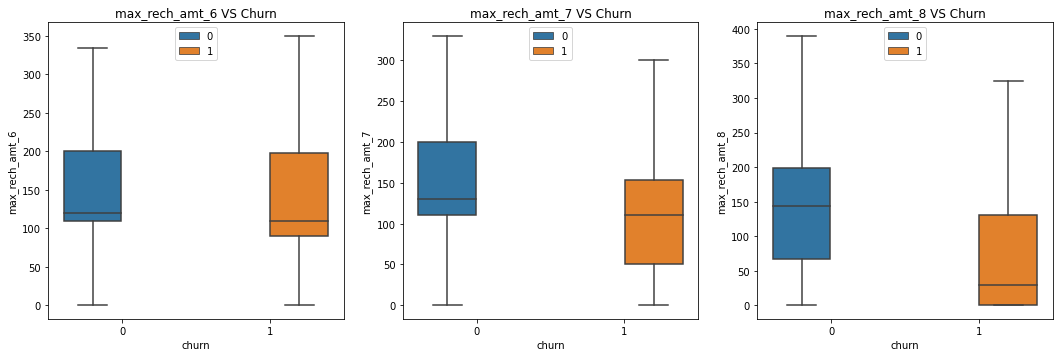

In [87]:
# boxplots of max_rech_amt columns
boxplotss('max_rech_amt')

- There is a drop in 25th percentile,median and 75th percentile of maximum recharge amount made by churned customers in 8th  month

<font color='green'> av_rech_amt_data columns

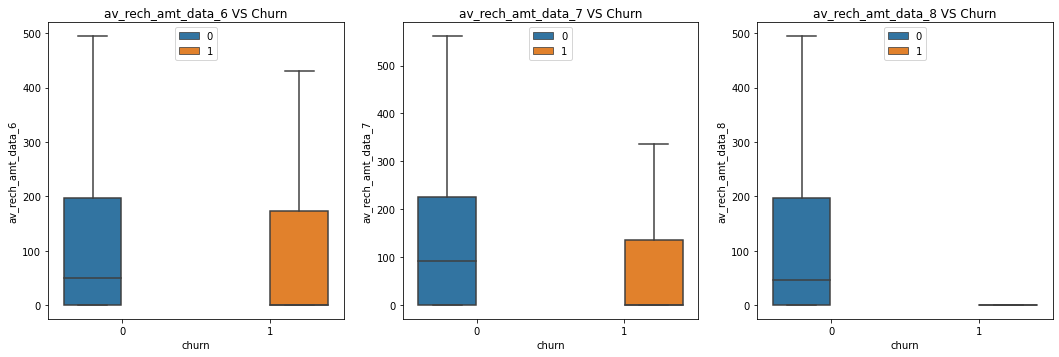

In [88]:
# boxplots of av_rech_amt_data columns
boxplotss('av_rech_amt_data')

- The average recharche amount(for data) paid by Churned customers is nearly zero in the 8th month
- 75th percentile and maximum values of av_rech_amt_data decreases over 6-8 month period
- boxplots of av_rech_amt_data  for customer who have not churned remains nearly same across months

<font color='green'> 'total_rech_num' columns

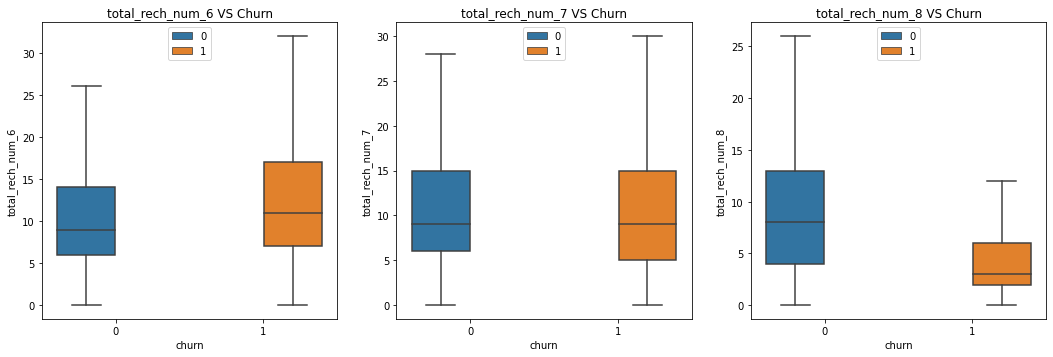

In [89]:
# boxplots of  'total_rech_num' columns
boxplotss('total_rech_num')

- The total number of recharge done by churned customers were higher than the customer not churned in the 6th month.
- However during 7th month number of recharge done by churned customers got reduced and became nearly equal to that of non churned customers
- In the action phase this number for churned customers got reducced drastically.


<font color='green'> max_rech_data columns

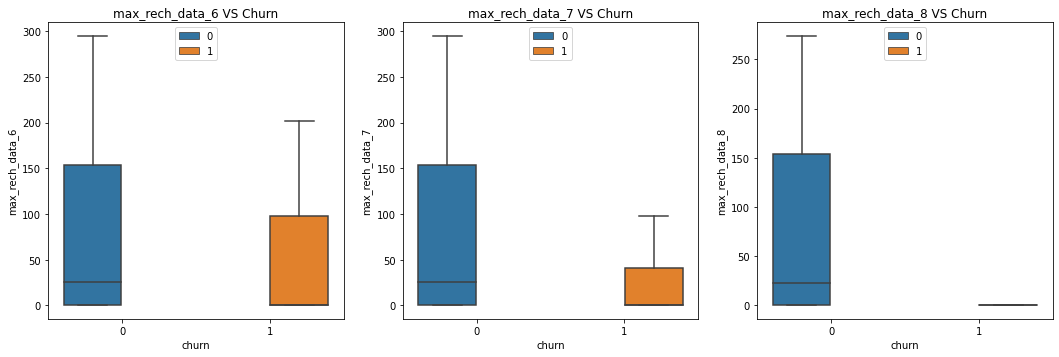

In [90]:
#plotting maximum recharge for data
boxplotss('max_rech_data')

- There is a drop in maximum recharge done for data in 8th month by churned customers

<font color='green'> last_day_rch_amt columns

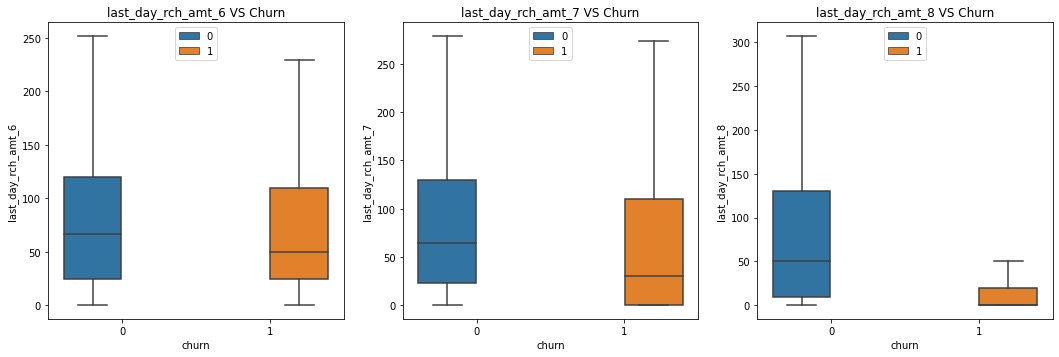

In [91]:
# plotting recharge amount on last day
boxplotss('last_day_rch_amt')

- Churned customers have recharched only for small amounts on last day in  8th month.
- Boxplots of non chunrers remain nearly same across different months


<font color='green'> Average of recharge amounts in good phase for churners and non churners

<AxesSubplot:xlabel='churn', ylabel='av_amt_6&7'>

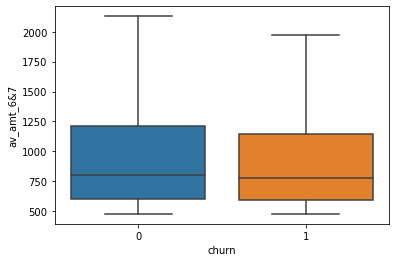

In [92]:
sns.boxplot(y = df['av_amt_6&7'],x= df['churn'],showfliers=False)

- Churners have slightly lower median and 75th percentile for av_amt_6&7 compared to non churners

<font color=green> 2G/3G associated columns

In [93]:
# 2G and 3G usage related variables
tg = [i for i in df.columns if '2g' in i or '3g' in i]
print(tg)

['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6', 'total_vol_3g']


- From this 3g/3g related variables, let's create a list of input key words for which we can then feed into the boxplotss function we defined earlier

In [94]:
# list of 2g/3g related variables(without their month tag)
inputvar =['vol_2g_mb','vol_3g_mb','monthly_2g','monthly_3g','sachet_2g','sachet_3g','vbc_3g']

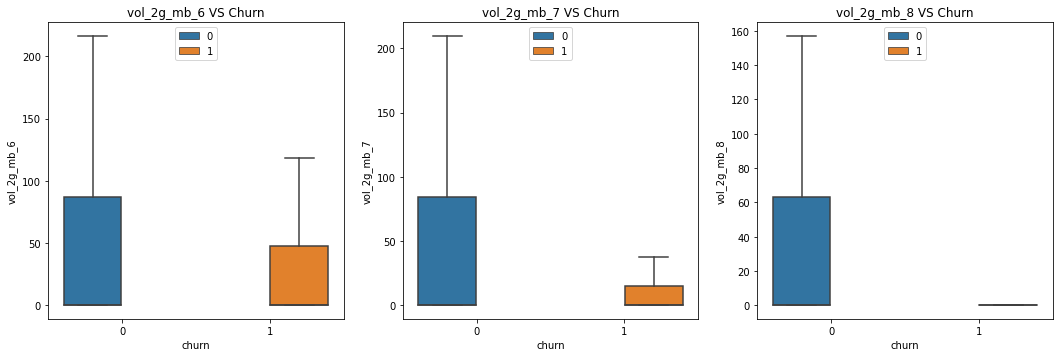

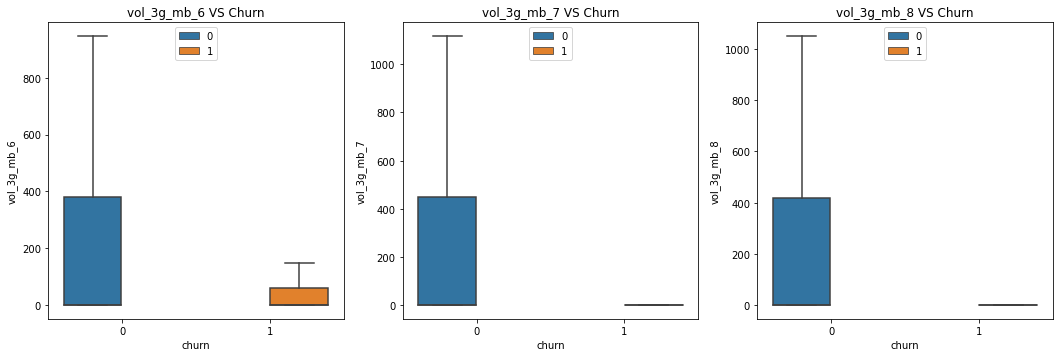

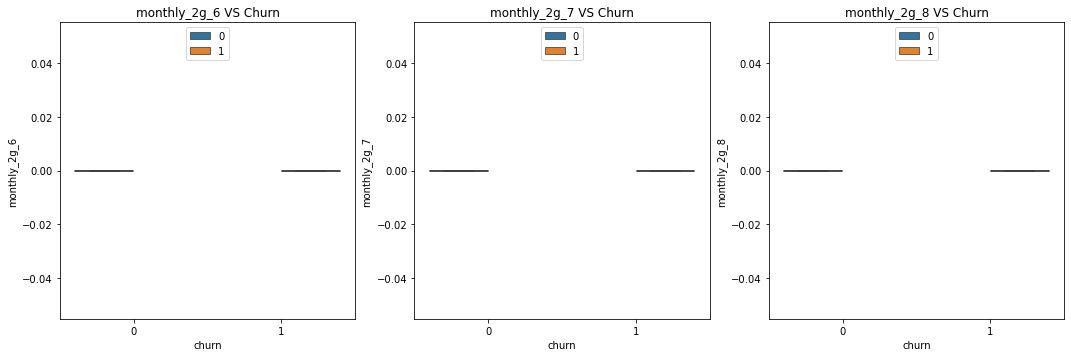

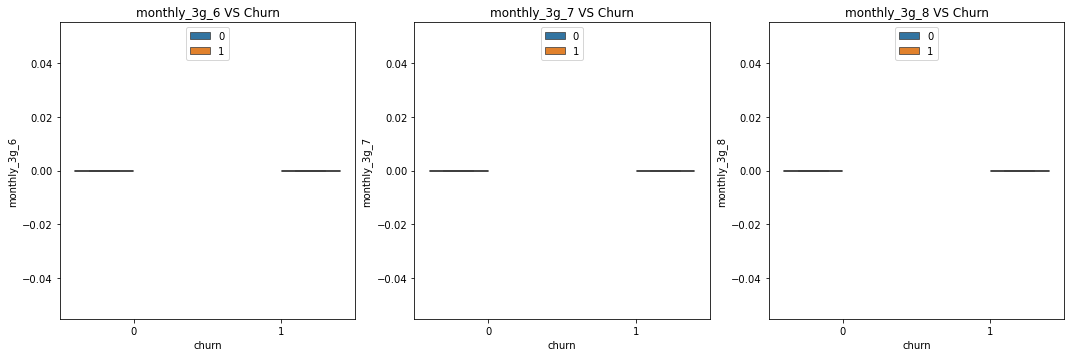

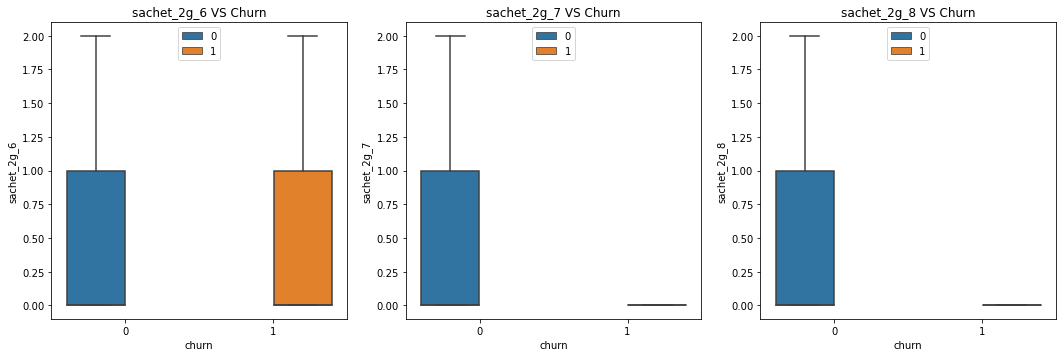

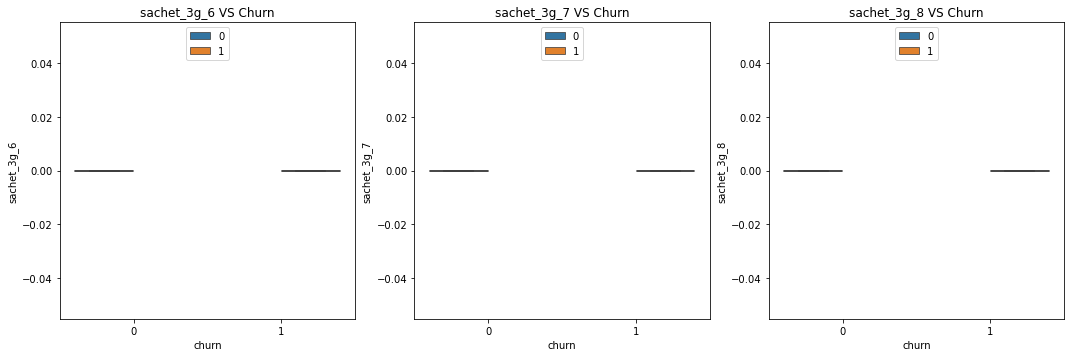

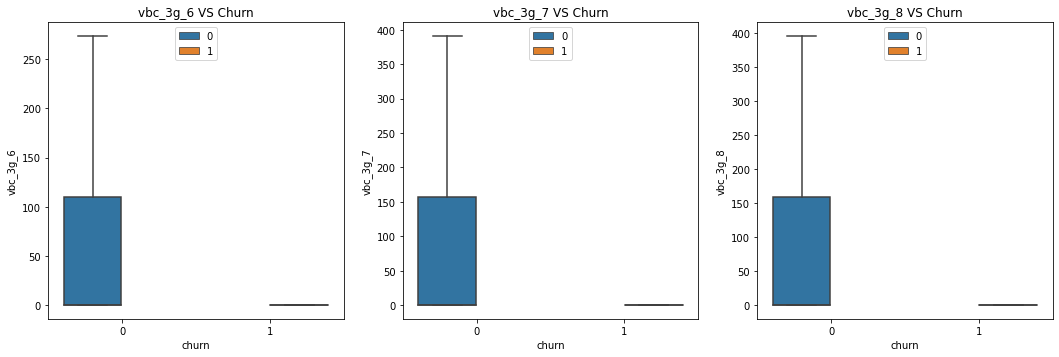

In [95]:
# plotting 2g/3g related variables 
for i in inputvar:
    boxplotss(i)

- 2g data volume  used by churned customers were low compared to non churners in all the three months.
- 2g data volume  used by customers who have not churned remains nearly same over months.
- People who use very less 3g data volume in 6th month and then nearly not using this service in 7th and 8th month has good chance of churning.
- There is a huge drop in sachet_2g values of churned customers after 6th month.
- Churners have volume based cost as nearly zero in all the three months while the boxplots of nun churners remains nearly same across different months
- Boxplots of sachet_3g,monthly_2g and monthly_3g do not give much information since their value range is very narrow, so let's check their mean values in different months. 


In [96]:
# defining a function for finding the mean values of input variable for churners and non churners
#and then for plotting the bar charts for the same

In [97]:
def plotbar(column_name):
    plt.subplot(1,3,1)
    df.groupby(df.churn)[column_name+'_6'].mean().plot.bar(color=['blue','orange'])
    plt.subplot(1,3,2)
    df.groupby(df.churn)[column_name+'_7'].mean().plot.bar(color=['blue','orange'])
    plt.subplot(1,3,3)
    df.groupby(df.churn)[column_name+'_8'].mean().plot.bar(color=['blue','orange'])
    print(df.groupby(df.churn)[column_name+'_6'].mean(),df.groupby(df.churn)[column_name+'_7'].mean(),
         df.groupby(df.churn)[column_name+'_8'].mean())

churn
0    0.206313
1    0.244162
Name: sachet_3g_6, dtype: float64 churn
0    0.228048
1    0.221221
Name: sachet_3g_7, dtype: float64 churn
0    0.214550
1    0.065137
Name: sachet_3g_8, dtype: float64


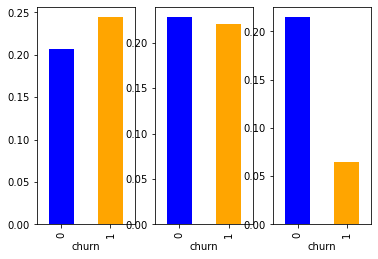

In [98]:
#plotting mean of sachet_3g for churners and non churners in different months
plotbar('sachet_3g')

- The mean sachet_3g of churners has dropped drastically in the 8th month

churn
0    0.181676
1    0.093404
Name: monthly_2g_6, dtype: float64 churn
0    0.193215
1    0.070873
Name: monthly_2g_7, dtype: float64 churn
0    0.165203
1    0.022941
Name: monthly_2g_8, dtype: float64


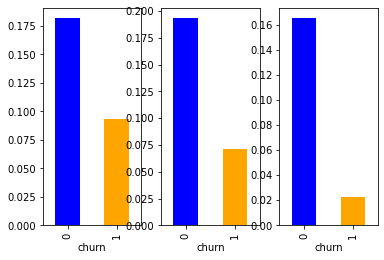

In [99]:
#plotting mean of monthly_2g for churners and non churners in different months
plotbar('monthly_2g')

- Churners have smaller mean value for monthly_2g in all three months
- mean monthly_2g for churners decreases over months

churn
0    0.219557
1    0.197460
Name: monthly_3g_6, dtype: float64 churn
0    0.236575
1    0.143794
Name: monthly_3g_7, dtype: float64 churn
0    0.224673
1    0.056944
Name: monthly_3g_8, dtype: float64


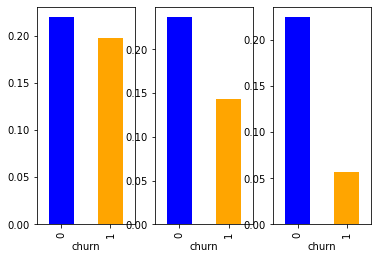

In [100]:
#plotting mean of monthly_3g for churners and non churners in different months
plotbar('monthly_3g')

- Churners have smaller mean value for monthly_3g compared to non churners in all the  three months.
- mean monthly_3g for churners decreases over months

<font color='green'> Average revenue per user columns

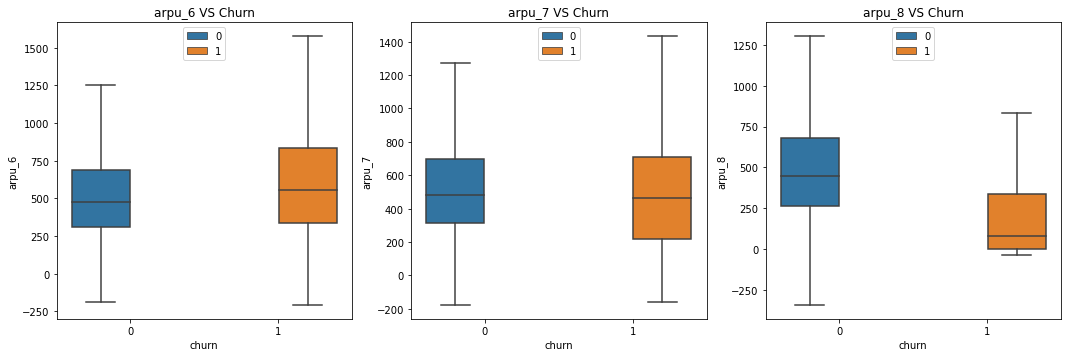

In [101]:
#plotting average revenue generated per user (for churners and non churners)
boxplotss('arpu')

- In the 6th month the average revenue generated from churners were higher than that from non churners
- But by the 8th month the average revenue per user got reduced for churners, as they have reduced using the services

#### <font color = 'green'>Age on network

<AxesSubplot:xlabel='churn', ylabel='aon'>

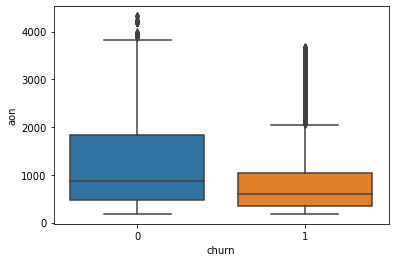

In [103]:
sns.boxplot(df.churn,df.aon)

In [104]:
df.groupby(df.churn)['aon'].quantile(.75)

churn
0    1839.25
1    1039.00
Name: aon, dtype: float64

 - The 75th percentile of age on network of churned customers is 1039 days, which means is that among the people who have churned 75% of the them have left within first 3 yrs.
- So the first three years are crucial for the retension of customers

<font color='green'> Minutes of usage columns

In [102]:
#mou related columns
mou_cols = [i for i in df.columns if 'mou' in i]
print(mou_cols)

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6'

In [103]:
# from mou columns let's extract variables that are related to outgoing calls (for th 6th month)
og_cols = [i for i in mou_cols if 'og' in i and '_6' in i]
print(og_cols)

['roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'total_og_mou_6']


In [104]:
# checking correlation between mou columns that are related to outgoing services

<AxesSubplot:>

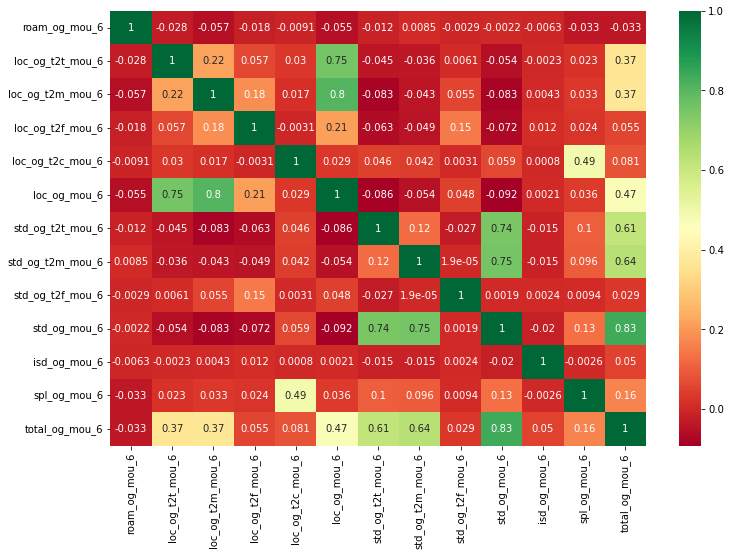

In [105]:
plt.figure(figsize=[12,8])
sns.heatmap(df[og_cols].corr(), cmap='RdYlGn', annot = True)

- total_og_mou_6, std_og_mou_6 and loc_og_mou_6 seems to have strong correlation with other variables 
- So we need to inspect these variables to avoid  any multicolinearity issues while building the model

- This strong correlation is a result of certain aggregated columns present in the data set

In [106]:
# total_og_mou_6

- we know that Total outgoing minute of usage = local outgoing minutes of usage+ STD outgoing minutes of usage+ special outgoing calls+ ISD outgoing calls +other outgoing minutes
- Let's check this by printing values in total_og_mou_6 and the aggregated values we get by adding the components,side to side

In [107]:
print(df.total_og_mou_6.head(),
      (df.loc_og_mou_6+df.std_og_mou_6+df.spl_og_mou_6+df.isd_og_mou_6+df.og_others_6).head())

0       0.00
7     487.53
8     508.36
21    860.34
23    134.38
Name: total_og_mou_6, dtype: float64 0      76.75
7     487.52
8     508.35
21    860.33
23    134.37
dtype: float64


- The values in total_og_mou is same as the sum of values in loc_og_mou,std_og_mou,spl_og_mou,isd_og_mou and og_others_6 columns


In [108]:
# std_og_mou_6

- We know that STD outgoing minutes of usage = STD operator to other mobile operator outgoing calls + STD same operator calls+STD operator to fixed lines of calls 
- Let's check this by printing values in std_og_mou_6 and the aggregated values we get by adding the components,side to side

In [109]:
print(df.std_og_mou_6.head(),(df.std_og_t2m_mou_6+df.std_og_t2t_mou_6+df.std_og_t2f_mou_6).head())

0      11.64
7      60.86
8     130.26
21    763.29
23      2.36
Name: std_og_mou_6, dtype: float64 0       3.95
7      60.85
8     130.25
21    763.29
23      2.36
dtype: float64


- The values in std_og_mou is same as the sum of values in std_og_t2m_mou,std_og_t2t_mou and std_og_t2f_mou

In [110]:
# loc_og_mou_6

- local outgoing minutes of usage =local outgoing t2m minutes of usage+local outgoing t2t minutes of usage+local outgoing t2f minutes of usage+ local outgoing t2c minutes of usage
- Let's check this by printing values in loc_og_mou_6 and the aggregated values we get by adding the components,side to side

In [111]:
print(df.loc_og_mou_6.head(),
      (df.loc_og_t2m_mou_6+df.loc_og_t2t_mou_6+df.loc_og_t2f_mou_6+df.loc_og_t2c_mou_6).head())

0      65.11
7     422.16
8     378.09
21     97.04
23    131.91
Name: loc_og_mou_6, dtype: float64 0      52.94
7     422.15
8     378.09
21     97.04
23    131.90
dtype: float64


- loc_og_mou_6 is an aggreagted column, as the printed values are same

- So Now we know that total_og_mou_6, std_og_mou_6 and loc_og_mou_6 are aggregated columns and the information contained in them can be derived from few other columns 
-Similarly we have corresponding aggreagted columns in month 7 and month 8
- So let's remove these aggreagted columns for all the months

In [112]:
# creating a list of column names to remove from original data set
delcol = [i for i in df.columns if 'total_og_mou_' in i or 'std_og_mou_'in i or 'loc_og_mou_' in i ]
print(delcol)

['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']


In [113]:
df.shape

(30001, 140)

In [114]:
#dropping aggregated columns from df
df.drop(delcol,axis=1,inplace=True)

In [115]:
df.shape

(30001, 131)

- So far we have only looked at the mou columns that are related to outgoing services
- So now let's check mou columns that are related to inccoming services

In [116]:
# from mou columns let's extract variables that are related to incoming calls (for th 6th month)
ic_cols = [i for i in mou_cols if 'ic' in i and '_6' in i]
print(ic_cols)

['roam_ic_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6']


In [117]:
# checking correlation between mou columns that are related to incoming services

<AxesSubplot:>

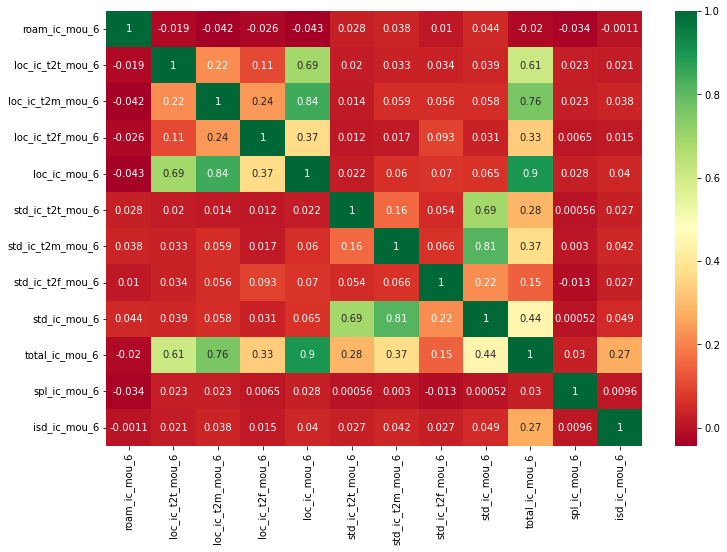

In [118]:
plt.figure(figsize=[12,8])
sns.heatmap(df[ic_cols].corr(), cmap='RdYlGn', annot = True)

- total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6  have strong correlation with other variables 
- So we need to inspect these variables to avoid  any multicolinearity issues while building the model

- This strong correlation could be a result aggregated columns present in the data set
- So just like we did earlier let's check if these three columns are derived from other columns

In [119]:
print(df.total_ic_mou_6.tail(),
      (df.loc_ic_mou_6+df.roam_ic_mou_6+df.isd_ic_mou_6+df.spl_ic_mou_6+df.std_ic_mou_6).tail())

99981    478.48
99984     89.48
99986    580.73
99988    998.96
99997      0.81
Name: total_ic_mou_6, dtype: float64 99981    478.31
99984     89.47
99986    580.72
99988    998.75
99997      0.81
dtype: float64


In [120]:
print(df.std_ic_mou_6.tail(),
      (df.std_ic_t2t_mou_6+df.std_ic_t2m_mou_6+df.std_ic_t2f_mou_6).tail())

99981     99.19
99984      3.33
99986     14.46
99988    691.44
99997      0.00
Name: std_ic_mou_6, dtype: float64 99981     99.19
99984      3.32
99986     14.45
99988    691.43
99997      0.00
dtype: float64


In [121]:
print(df.loc_ic_mou_6.tail(),
     (df.loc_ic_t2t_mou_6+df.loc_ic_t2m_mou_6+df.loc_ic_t2f_mou_6).tail())

99981    378.99
99984     85.71
99986    566.26
99988    307.31
99997      0.81
Name: loc_ic_mou_6, dtype: float64 99981    378.99
99984     85.70
99986    566.25
99988    307.30
99997      0.81
dtype: float64


- From the similar printed values, we could say  that total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6 are aggregated columns and the information contained in them can be derived from few other columns 
-Similarly we have corresponding aggreagted columns in month 7 and month 8
- So let's remove these aggreagted columns for all the months

In [122]:
# creating a list of column names to remove from original data set
delcol2 = [i for i in df.columns if 'total_ic_mou_' in i or 'std_ic_mou_'in i or 'loc_ic_mou_' in i ]
print(delcol2)

['loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']


In [123]:
df.shape

(30001, 131)

In [124]:
#dropping aggregated columns from df
df.drop(delcol2,axis=1,inplace=True)

In [125]:
df.shape

(30001, 122)

- Let's have a look at correlations among variables


In [126]:
# absolute values of correlation coefficients
c=df.corr().abs()

In [127]:
s=c.unstack()

In [128]:
# checking correlation pairs with absolute value of coefficient above 0.7
s[(s>0.7) & (s!=1)]

arpu_6                 total_rech_amt_6         0.946125
                       total_arpu               0.851342
arpu_7                 arpu_8                   0.759858
                       total_rech_amt_7         0.943588
                       total_rech_amt_8         0.754470
                       total_arpu               0.913951
arpu_8                 arpu_7                   0.759858
                       total_rech_amt_7         0.756400
                       total_rech_amt_8         0.955351
                       total_arpu               0.896850
onnet_mou_6            onnet_mou_7              0.750819
                       std_og_t2t_mou_6         0.859471
onnet_mou_7            onnet_mou_6              0.750819
                       onnet_mou_8              0.806106
                       std_og_t2t_mou_7         0.860381
onnet_mou_8            onnet_mou_7              0.806106
                       std_og_t2t_mou_8         0.860771
offnet_mou_6           offnet_m

- There are many variables which are highly correlated with each other.
- We will have to remove some of the variables to avoid issues of multicollinearity in the model

In [129]:
# Let's drop 'av_amt_6&7' as this information can be derived from other variables 
# Otherwise presence of 'av_amt_6&7' will lead to multicollinearity issues while building model.

In [130]:
df.drop('av_amt_6&7',axis=1,inplace=True)

In [131]:
df.shape

(30001, 121)

 - we can also combine columns of both 6th and 7th months.
 - From the EDA it was evident that there is not much variation within these two months and the effect of churning becomes more apparent only in the 8th month.
 - So we are combining columns of 6th and 7th columns by taking their average values.

In [132]:
# Variables related to good phase
gp_cols =[i for i in df.columns if '_6' in i or'_7' in i]
print(gp_cols)

['arpu_6', 'arpu_7', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6', 'roam_og_mou_7', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6', 'spl_og_mou_7', 'og_others_6', 'og_others_7', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'spl_ic_mou_6', 'spl_ic_mou_7', 'isd_ic_mou_6', 'isd_ic_mou_7', 'ic_others_6', 'ic_others_7', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_amt_6', 'total_rech_amt_7', 'max_rech_amt_6', 'max_rech_amt_7', 'last_day_rch_amt_6', 'la

In [133]:
len(gp_cols)

78

In [134]:
# creating a list emp_col to store Variables related to good phase without month tags
emp_col = []
for i in gp_cols:
    if i[0:-2] not in emp_col:
        emp_col.append(i[0:-2])
print(emp_col)

['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'isd_og_mou', 'spl_og_mou', 'og_others', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others', 'total_rech_num', 'total_rech_amt', 'max_rech_amt', 'last_day_rch_amt', 'total_rech_data', 'max_rech_data', 'av_rech_amt_data', 'vol_2g_mb', 'vol_3g_mb', 'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g', 'vbc_3g', 'total_data_rech_amt']


In [135]:
len(emp_col)

39

In [136]:
df.shape

(30001, 121)

In [137]:
# creating new variables in df to store average values 6th and 7th months
for i in emp_col:
    avg_6_7 = i+'_avg_6_7'
    df[avg_6_7] = (df[i+'_6']+df[i+'_7'])/2

In [138]:
df.shape

(30001, 160)

In [139]:
# dropping columns related to 6th and 7th months
df.drop(gp_cols,axis=1,inplace=True)

In [140]:
df.shape

(30001, 82)

# Model building
 - dividing into train and test sets
 - MinMax scaling for numeric features
 - building multiple predictive models

#### <font color='green'>Splitting the Data into Training and Testing Sets

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
# Putting response variable to y
y = df.churn

In [143]:
# Putting feature variables to X
X = df.drop('churn',axis = 1)

In [144]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,test_size = 0.3 ,random_state=100,stratify = y)

In [145]:
#checking shapes of train and test tests

In [146]:
X_train.shape,X_test.shape

((21000, 81), (9001, 81))

In [147]:
y_train.shape,y_test.shape

((21000,), (9001,))

#### <font color='green'>Feature scaling

In [148]:
# importing MinMAX scaler
from sklearn.preprocessing import MinMaxScaler

In [149]:
#instantiating the scaler
scaler = MinMaxScaler()

In [150]:
# creating a list of numeric columns in X_train
num_col= X_train.select_dtypes('number').columns
len(num_col)

81

- All of our features are numeric,so we can apply scaling to all the variables

In [151]:
X_train.shape

(21000, 81)

In [152]:
# Applying scaler() to continuous variables 
#fitting on data
X_train[num_col]= scaler.fit_transform(X_train[num_col])
X_train.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,total_arpu,total_vol_3g,total_data_rech_amt_8,arpu_avg_6_7,onnet_mou_avg_6_7,offnet_mou_avg_6_7,roam_ic_mou_avg_6_7,roam_og_mou_avg_6_7,loc_og_t2t_mou_avg_6_7,loc_og_t2m_mou_avg_6_7,loc_og_t2f_mou_avg_6_7,loc_og_t2c_mou_avg_6_7,std_og_t2t_mou_avg_6_7,std_og_t2m_mou_avg_6_7,std_og_t2f_mou_avg_6_7,isd_og_mou_avg_6_7,spl_og_mou_avg_6_7,og_others_avg_6_7,loc_ic_t2t_mou_avg_6_7,loc_ic_t2m_mou_avg_6_7,loc_ic_t2f_mou_avg_6_7,std_ic_t2t_mou_avg_6_7,std_ic_t2m_mou_avg_6_7,std_ic_t2f_mou_avg_6_7,spl_ic_mou_avg_6_7,isd_ic_mou_avg_6_7,ic_others_avg_6_7,total_rech_num_avg_6_7,total_rech_amt_avg_6_7,max_rech_amt_avg_6_7,last_day_rch_amt_avg_6_7,total_rech_data_avg_6_7,max_rech_data_avg_6_7,av_rech_amt_data_avg_6_7,vol_2g_mb_avg_6_7,vol_3g_mb_avg_6_7,monthly_2g_avg_6_7,sachet_2g_avg_6_7,monthly_3g_avg_6_7,sachet_3g_avg_6_7,vbc_3g_avg_6_7,total_data_rech_amt_avg_6_7
81898,0.038836,0.000338,0.008243,0.000000,0.000000,0.000338,0.021593,0.004857,0.0,0.000000,0.000081,0.005185,0.0,0.000000,0.0,0.002758,0.099468,0.037525,0.000000,0.007083,0.010237,0.000000,0.0,0.000000,0.030612,0.010680,0.034165,0.034165,0.066667,0.097749,0.195498,0.008805,0.021296,0.0,0.045455,0.0,0.04878,0.647187,0.038137,0.007714,0.023367,0.028878,0.030608,0.000281,0.011981,0.000000,0.000000,0.000403,0.018326,0.005061,0.005183,0.000000,0.000000,0.001449,0.000000,0.001905,0.000000,0.000796,0.044902,0.023958,0.000000,0.000162,0.005915,0.000000,0.000000,0.000000,0.038710,0.007733,0.046075,0.016129,0.036697,0.097749,0.067488,0.007352,0.023921,0.000000,0.027027,0.0,0.037736,0.067875,0.010765
33489,0.035690,0.013419,0.009594,0.000000,0.000000,0.007741,0.014186,0.002186,0.0,0.008189,0.004442,0.000000,0.0,0.001247,0.0,0.004644,0.008498,0.009400,0.000552,0.000592,0.000000,0.198413,0.0,0.000066,0.030612,0.006774,0.029220,0.015060,0.016667,0.014791,0.007395,0.000228,0.000000,0.0,0.022727,0.0,0.00000,0.062787,0.000000,0.008820,0.000000,0.000273,0.033948,0.026994,0.013525,0.008521,0.009497,0.004511,0.005843,0.000945,0.014694,0.022666,0.007833,0.000000,0.000000,0.010363,0.000000,0.005014,0.004832,0.000710,0.000746,0.000516,0.000000,0.012041,0.000000,0.000162,0.058065,0.011427,0.036072,0.028548,0.045872,0.026045,0.017316,0.029528,0.000000,0.000000,0.054054,0.0,0.018868,0.000000,0.004037
21296,0.046798,0.028138,0.039556,0.000000,0.000000,0.027991,0.095374,0.014874,0.0,0.000212,0.004809,0.000000,0.0,0.000000,0.0,0.049388,0.085552,0.008049,0.000000,0.008013,0.000000,0.000000,0.0,0.000893,0.035714,0.020410,0.107665,0.107665,0.033333,0.115113,0.064952,0.079941,0.009431,0.0,0.022727,0.1,0.00000,0.238107,0.027858,0.020290,0.003888,0.004797,0.045154,0.042529,0.064737,0.000000,0.000000,0.058104,0.094378,0.026804,0.000000,0.002009,0.005481,0.002716,0.000626,0.000218,0.000000,0.038825,0.109696,0.020498,0.005859,0.015415,0.002523,0.000000,0.001855,0.000000,0.038710,0.023436,0.102758,0.054677,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.101470,0.000000
85765,0.036987,0.001308,0.032517,0.011745,0.005891,0.000805,0.017860,0.000969,0.0,0.000605,0.023123,0.012729,0.0,0.006548,0.0,0.001376,0.024645,0.000000,0.000982,0.012386,0.000215,0.000000,0.0,0.000000,0.030612,0.008959,0.076197,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.328182,0.000000,0.013583,0.000000,0.000000,0.040378,0.009499,0.129384,0.000000,0.000000,0.013572,0.059087,0.000000,0.000000,0.000033,0.099255,0.134845,0.000000,0.00

In [153]:
#values before scaling
X_train[num_col].describe()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,total_arpu,total_vol_3g,total_data_rech_amt_8,arpu_avg_6_7,onnet_mou_avg_6_7,offnet_mou_avg_6_7,roam_ic_mou_avg_6_7,roam_og_mou_avg_6_7,loc_og_t2t_mou_avg_6_7,loc_og_t2m_mou_avg_6_7,loc_og_t2f_mou_avg_6_7,loc_og_t2c_mou_avg_6_7,std_og_t2t_mou_avg_6_7,std_og_t2m_mou_avg_6_7,std_og_t2f_mou_avg_6_7,isd_og_mou_avg_6_7,spl_og_mou_avg_6_7,og_others_avg_6_7,loc_ic_t2t_mou_avg_6_7,loc_ic_t2m_mou_avg_6_7,loc_ic_t2f_mou_avg_6_7,std_ic_t2t_mou_avg_6_7,std_ic_t2m_mou_avg_6_7,std_ic_t2f_mou_avg_6_7,spl_ic_mou_avg_6_7,isd_ic_mou_avg_6_7,ic_others_avg_6_7,total_rech_num_avg_6_7,total_rech_amt_avg_6_7,max_rech_amt_avg_6_7,last_day_rch_amt_avg_6_7,total_rech_data_avg_6_7,max_rech_data_avg_6_7,av_rech_amt_data_avg_6_7,vol_2g_mb_avg_6_7,vol_3g_mb_avg_6_7,monthly_2g_avg_6_7,sachet_2g_avg_6_7,monthly_3g_avg_6_7,sachet_3g_avg_6_7,vbc_3g_avg_6_7,total_data_rech_amt_avg_6_7
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.00000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,0.042206,0.021702,0.024117,0.004348,0.003807,0.007262,0.030809,0.006411,0.005636,0.019694,0.011206,0.003103,0.00038,0.006927,0.000199,0.016016,0.032013,0.011064,0.003219,0.005010,0.001874,0.020462,0.004318,0.001057,0.050723,0.012951,0.036370,0.020916,0.027192,0.046990,0.039513,0.009808,0.011956,0.030781,0.024203,0.021333,0.004862,0.248775,0.013390,0.015680,0.015021,0.005491,0.040718,0.035980,0.054717,0.004780,0.009714,0.016614,0.039176,0.008933,0.004151,0.023166,0.030692,0.004847,0.000402,0.005708,0.001127,0.011858,0.034148,0.011567,0.002614,0.009720,0.002352,0.002434,0.001937,0.000971,0.072675,0.017529,0.052026,0.032513,0.032400,0.051200,0.030368,0.015824,0.016550,0.040053,0.030891,0.019907,0.008063,0.021128,0.008817
std,0.015403,0.042129,0.033976,0.024940,0.020914,0.020531,0.047146,0.021581,0.022894,0.052982,0.028760,0.021882,0.00917,0.022253,0.008235,0.041125,0.046512,0.032498,0.017388,0.018361,0.015135,0.081720,0.027079,0.011973,0.046922,0.014338,0.040604,0.033950,0.050396,0.071301,0.062463,0.029110,0.031055,0.081612,0.058509,0.061585,0.026545,0.231405,0.033142,0.014136,0.034025,0.018458,0.014101,0.060207,0.066059,0.022006,0.039403,0.042441,0.055950,0.027510,0.015237,0.053328,0.065288,0.031431,0.009131,0.015945,0.007979,0.029075,0.046096,0.032515,0.012869,0.030121,0.015443,0.009184,0.012720,0.010603,0.055794,0.014486,0.047657,0.037943,0.049659,0.066522,0.040787,0.037450,0.038343,0.086583,0.065513,0.050542,0.034214,0.049079,0.021974
min,0.000000,0.000000,0.000000,0.000000,0.000000

In [154]:
#comparing values after scaling
df[num_col].describe()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,total_arpu,total_vol_3g,total_data_rech_amt_8,arpu_avg_6_7,onnet_mou_avg_6_7,offnet_mou_avg_6_7,roam_ic_mou_avg_6_7,roam_og_mou_avg_6_7,loc_og_t2t_mou_avg_6_7,loc_og_t2m_mou_avg_6_7,loc_og_t2f_mou_avg_6_7,loc_og_t2c_mou_avg_6_7,std_og_t2t_mou_avg_6_7,std_og_t2m_mou_avg_6_7,std_og_t2f_mou_avg_6_7,isd_og_mou_avg_6_7,spl_og_mou_avg_6_7,og_others_avg_6_7,loc_ic_t2t_mou_avg_6_7,loc_ic_t2m_mou_avg_6_7,loc_ic_t2f_mou_avg_6_7,std_ic_t2t_mou_avg_6_7,std_ic_t2m_mou_avg_6_7,std_ic_t2f_mou_avg_6_7,spl_ic_mou_avg_6_7,isd_ic_mou_avg_6_7,ic_others_avg_6_7,total_rech_num_avg_6_7,total_rech_amt_avg_6_7,max_rech_amt_avg_6_7,last_day_rch_amt_avg_6_7,total_rech_data_avg_6_7,max_rech_data_avg_6_7,av_rech_amt_data_avg_6_7,vol_2g_mb_avg_6_7,vol_3g_mb_avg_6_7,monthly_2g_avg_6_7,sachet_2g_avg_6_7,monthly_3g_avg_6_7,sachet_3g_avg_6_7,vbc_3g_avg_6_7,total_data_rech_amt_avg_6_7
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,508.597957,235.378852,338.682670,12.500551,19.865615,78.536131,153.336181,5.886385,1.707746,148.441175,157.479595,1.584734,1.948970,6.557204,0.057607,63.246719,148.511781,14.439567,13.913705,28.002035,2.561970,0.026567,10.998257,1.224455,9.972868,584.365454,160.144462,92.393654,1.621913,72.492917,122.132258,105.913072,351.493998,0.153628,1.054865,0.211026,0.202393,1209.368754,169.138860,1627.870984,1065.949267,463.252944,559.636514,264.907142,377.594352,14.376429,23.361816,85.291605,163.861143,6.383899,1.73249,170.059634,183.745488,1.814799,2.138634,6.463458,0.351998,66.328489,152.042751,15.673333,15.158141,30.045562,2.747149,0.04040,11.330242,1.326893,11.784924,660.615179,170.743275,100.624813,1.760758,78.960685,135.218053,125.809755,357.227634,0.178877,1.140045,0.223393,0.218443,168.698363,492.005449
std,501.961981,457.844464,479.882371,74.125281,104.719009,227.227313,232.764460,19.502281,7.208138,397.564547,409.050964,10.931804,44.712024,20.311857,3.315125,158.695355,213.624715,43.293460,71.338522,103.321111,19.896938,0.110697,70.600636,12.783238,9.274370,611.245907,173.207799,145.182324,2.996010,110.567519,195.586944,313.384838,919.021056,0.406486,2.535940,0.617549,1.100107,957.677989,420.974354,1280.839485,2446.695503,1622.766035,429.909145,439.296246,456.589817,66.078507,93.281425,222.209181,231.799948,20.955732,6.48236,385.607865,393.862134,11.529439,44.719965,17.314038,2.464511,157.056893,206.419943,44.343431,75.054257,93.948363,17.908139,0.15064,73.233106,13.728038,8.634676,5

- Features have been scaled properly
- So Now,none of the variables will have a disproportionate effect on the model’s results.

#### <font color='green'>Handling Data Imbalance 

- With the help of SMOTE we can balance the data

In [155]:
# importing SMOTE
from imblearn.over_sampling import SMOTE

In [156]:
# instantiating smote
smote = SMOTE(random_state=42)

In [157]:
# shape of X_train and y_train before applying smote
X_train.shape,y_train.shape

((21000, 81), (21000,))

In [158]:
#applying smote on data
X_train,y_train = smote.fit_resample(X_train,y_train)

In [159]:
# checking shapes of X_train and y_train after applying smote
X_train.shape,y_train.shape

((38582, 81), (38582,))

#### <font color='green'>Creating first logistic training model

In [160]:
# logistic regression model
lgm1 = sm.GLM(y_train,(sm.add_constant(X_train)),fm = sm.families.Binomial())
lgm1 = lgm1.fit()

In [161]:
lgm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38504
Model Family:                Gaussian   Df Model:                           77
Link Function:               identity   Scale:                         0.12622
Method:                          IRLS   Log-Likelihood:                -14777.
Date:                Sat, 29 Oct 2022   Deviance:                       4859.4
Time:                        13:36:52   Pearson chi2:                 4.86e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.5273      0.018     28.988      0.000       0.492       0.563
arpu_8                         -0.1462      0.564     -0.259      0.795      -1.252       0.959
onnet_mou_8                    56.6897      1.076     52.698      0.000      54.581      58.798
offnet_mou_8                   71.1496      1.299     54.777      0.000      68.604      73.695
roam_ic_mou_8                   0.6206      0.082      7.603      0.000       0.461       0.781
roam_og_mou_8                 -26.6646      0.513    -52.019      0.000     -27.669     -25.660
loc_og_t2t_mou_8              -58.6540      1.096    -53.508      0.000     -60.802     -56.506
loc_og_t2m_mou_8              -26.1333      0.472    -55.329      0.000     -27.059     -25.208
loc_og_t2f_mou_8               -5.0616      0.204    -24.861      0.000      -5.461      -4.663
loc_og_t2c_mou_8               -0.0359      0.124     -0.288      0.773      -0.280       0.208
std_og_t2t_mou_8              -40.3242      0.753    -53.523      0.000     -41.801     -38.848
std_og_t2m_mou_8              -72.7086      1.305    -55.719      0.000     -75.266     -70.151
std_og_t2f_mou_8               -3.1512      0.172    -18.275      0.000      -3.489      -2.813
isd_og_mou_8                  -28.4730      0.901    -31.598      0.000     -30.239     -26.707
spl_og_mou_8                   -4.2622      0.151    -28.199      0.000      -4.558      -3.966
og_others_8                    -0.4293      0.300     -1.433      0.152      -1.017       0.158
loc_ic_t2t_mou_8               -0.8308      0.095     -8.770      0.000      -1.016      -0.645
loc_ic_t2m_mou_8               -1.8138      0.084    -21.564      0.000      -1.979      -1.649
loc_ic_t2f_mou_8               -0.4599      0.113     -4.066      0.000      -0.682      -0.238
std_ic_t2t_mou_8               -1.3539      0.193     -7.006      0.000      -1.733      -0.975
std_ic_t2m_mou_8               -0.6364      0.175     -3.636      0.000      -0.979      -0.293
std_ic_t2f_mou_8               -0.8141      0.240     -3.398      0.001      -1.284      -0.345
spl_ic_mou_8                   -0.6064      0.030    -20.475      0.000      -0.664      -0.548
isd_ic_mou_8                   -0.3560      0.119     -3.002      0.003      -0.588      -0.124
ic_others_8                     0.2011      0.318      0.631      0.528      -0.423       0.825
total_rech_num_8               -1.0385      0.083    -12.549      0.000      -1.201      -0.876
total_rech_amt_8               -4.1346      0.703     -5.881      0.000      -5.513      -2.757
max_rech_amt_8                  0.7352      0.102      7.217      0.000       0.536       0.935
last_day_rch_amt_8             -2.0030      0.094    -21.246      0.000      -2.188      -1.818
total_rech_

There are many variables whose p-values are high, implying that these variables are statistically insignificant. So we need to eliminate some of the variables in order to build a better model.

We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we will use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

#### <font color='green'>Feature Selection Using RFE

- let's import RFE and LinearRegression libraries from sklearn for implementing Linear Regression using Recurssive feature elimination

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [163]:
X_train.shape

(38582, 81)

- we have 81  varibles in X_train,since it is not feasible to use all the variables, let's consider 20 variables to start with.


In [164]:
# Running RFE with the output number of the variable equal to 20
logreg = LogisticRegression(random_state=42)

In [165]:
rfe = RFE(estimator=logreg,n_features_to_select=20)

In [166]:
rfe = rfe.fit(X_train,y_train)

In [167]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_8', False, 5),
 ('offnet_mou_8', False, 9),
 ('roam_ic_mou_8', False, 28),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_8', True, 1),
 ('loc_og_t2c_mou_8', False, 46),
 ('std_og_t2t_mou_8', False, 15),
 ('std_og_t2m_mou_8', True, 1),
 ('std_og_t2f_mou_8', False, 6),
 ('isd_og_mou_8', False, 60),
 ('spl_og_mou_8', True, 1),
 ('og_others_8', False, 56),
 ('loc_ic_t2t_mou_8', True, 1),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', True, 1),
 ('std_ic_t2t_mou_8', False, 11),
 ('std_ic_t2m_mou_8', False, 4),
 ('std_ic_t2f_mou_8', False, 23),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_8', False, 21),
 ('ic_others_8', False, 41),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', True, 1),
 ('max_rech_amt_8', False, 7),
 ('last_day_rch_amt_8', True, 1),
 ('total_rech_data_8', True, 1),
 ('max_rech_data_8', True, 1),
 ('av_rech_amt_data_8', False, 48),
 ('vol_2g_mb_8', True, 1),
 ('vo

In [168]:
# selected features (storing them in 'col')
col = X_train.columns[rfe.support_]
col

Index(['arpu_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'std_og_t2m_mou_8', 'spl_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'max_rech_data_8',
       'vol_2g_mb_8', 'vbc_3g_8', 'arpu_avg_6_7', 'total_rech_num_avg_6_7'],
      dtype='object')

#### <font color='green'>Building Second logistic regression model with features selected using RFE

In [169]:
# second model

In [170]:
X_train_sm = sm.add_constant(X_train[col])

In [171]:
lgm2 = sm.GLM(y_train,X_train_sm,family= sm.families.Binomial())
lgm2 = lgm2.fit()
lgm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38561
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15596.
Date:                Sat, 29 Oct 2022   Deviance:                       31193.
Time:                        13:38:08   Pearson chi2:                 1.01e+07
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.3156      0.155      2.037      0.042       0.012       0.619
arpu_8                   -19.0185      5.226     -3.639      0.000     -29.261      -8.776
roam_og_mou_8             13.3410      0.680     19.609      0.000      12.007      14.674
loc_og_t2t_mou_8         -14.7776      2.128     -6.943      0.000     -18.949     -10.606
loc_og_t2m_mou_8         -13.8863      0.971    -14.306      0.000     -15.789     -11.984
loc_og_t2f_mou_8         -14.2876      2.060     -6.935      0.000     -18.325     -10.250
std_og_t2m_mou_8          -6.3674      0.812     -7.844      0.000      -7.958      -4.776
spl_og_mou_8             -11.1182      1.506     -7.380      0.000     -14.071      -8.166
loc_ic_t2t_mou_8         -17.3230      1.566    -11.061      0.000     -20.393     -14.253
loc_ic_t2m_mou_8         -11.8456      0.990    -11.965      0.000     -13.786      -9.905
loc_ic_t2f_mou_8         -16.1984      1.612    -10.048      0.000     -19.358     -13.039
spl_ic_mou_8              -6.2599      0.386    -16.201      0.000      -7.017      -5.503
total_rech_num_8         -15.2959      0.775    -19.733      0.000     -16.815     -13.777
total_rech_amt_8         -42.7746      5.442     -7.860      0.000     -53.440     -32.109
last_day_rch_amt_8       -15.2715      0.744    -20.534      0.000     -16.729     -13.814
total_rech_data_8        -14.2625      0.704    -20.270      0.000     -15.642     -12.883
max_rech_data_8           -2.4510      0.311     -7.889      0.000      -3.060      -1.842
vol_2g_mb_8              -13.6867      1.093    -12.525      0.000     -15.828     -11.545
vbc_3g_8                 -13.1397      0.999    -13.157      0.000     -15.097     -11.182
arpu_avg_6_7              62.5063      2.351     26.591      0.000      57.899      67.114
total_rech_num_avg_6_7     3.7242      0.465      8.010      0.000       2.813       4.636
==========================================================================================
"""

- All the selected variables are significant in this model as their p values are under 0.05

In [172]:
####  calculating VIFs for checking multicollinearity

In [173]:
#importing vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [174]:
# Checking for the VIF values of the feature variables.
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

dff = pd.DataFrame()

dff['Features'] = X_train[col].columns
dff['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
dff['VIF'] = round(dff['VIF'],2)
dff = dff.sort_values(by = 'VIF',ascending = False)
dff

,Features,VIF
0,arpu_8,34.97
18,arpu_avg_6_7,25.64
19,total_rech_num_avg_6_7,5.69
11,total_rech_num_8,5.41
12,total_rech_amt_8,4.80
3,loc_og_t2m_mou_8,2.17
8,loc_ic_t2m_mou_8,2.10
15,max_rech_data_8,1.97
13,last_day_rch_amt_8,1.82
14,total_rech_data_8,1.67


 -  Few features have very high vif values, so that might lead into issues of multicollinearity
 - So let's remove variables with very high vif values one by one and then build models

#### <font color='green'>3rd logistic model


In [175]:
# dropping variable with highest vif value
col=col.drop('arpu_8',1)

In [176]:
X_train_sm = sm.add_constant(X_train[col])

In [177]:
lgm3 = sm.GLM(y_train,X_train_sm,family= sm.families.Binomial())
lgm3 = lgm3.fit()
lgm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38562
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15603.
Date:                Sat, 29 Oct 2022   Deviance:                       31206.
Time:                        13:38:36   Pearson chi2:                 1.03e+07
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.1733      0.076     -2.274      0.023      -0.323      -0.024
roam_og_mou_8             12.9138      0.665     19.409      0.000      11.610      14.218
loc_og_t2t_mou_8         -15.0365      2.142     -7.021      0.000     -19.234     -10.839
loc_og_t2m_mou_8         -14.3892      0.965    -14.915      0.000     -16.280     -12.498
loc_og_t2f_mou_8         -15.3052      2.063     -7.419      0.000     -19.349     -11.262
std_og_t2m_mou_8          -6.7854      0.803     -8.449      0.000      -8.360      -5.211
spl_og_mou_8             -11.3084      1.507     -7.506      0.000     -14.261      -8.356
loc_ic_t2t_mou_8         -17.4626      1.570    -11.123      0.000     -20.540     -14.386
loc_ic_t2m_mou_8         -11.7466      0.989    -11.878      0.000     -13.685      -9.808
loc_ic_t2f_mou_8         -16.3396      1.619    -10.095      0.000     -19.512     -13.167
spl_ic_mou_8              -6.2552      0.387    -16.184      0.000      -7.013      -5.498
total_rech_num_8         -15.6335      0.770    -20.305      0.000     -17.143     -14.124
total_rech_amt_8         -59.9591      2.736    -21.919      0.000     -65.321     -54.598
last_day_rch_amt_8       -15.1911      0.740    -20.539      0.000     -16.641     -13.741
total_rech_data_8        -14.2210      0.703    -20.225      0.000     -15.599     -12.843
max_rech_data_8           -2.4700      0.310     -7.965      0.000      -3.078      -1.862
vol_2g_mb_8              -13.7367      1.094    -12.559      0.000     -15.880     -11.593
vbc_3g_8                 -13.3447      0.999    -13.361      0.000     -15.302     -11.387
arpu_avg_6_7              60.9218      2.291     26.593      0.000      56.432      65.412
total_rech_num_avg_6_7     3.9417      0.462      8.536      0.000       3.037       4.847
==========================================================================================
"""

- All the variables in this model are significant as their p values are lesser than 0.05

In [178]:
# Checking for the VIF values of the feature variables.
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

dff = pd.DataFrame()

dff['Features'] = X_train[col].columns
dff['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
dff['VIF'] = round(dff['VIF'],2)
dff = dff.sort_values(by = 'VIF',ascending = False)
dff

,Features,VIF
18,total_rech_num_avg_6_7,5.49
17,arpu_avg_6_7,5.49
10,total_rech_num_8,4.92
11,total_rech_amt_8,3.92
2,loc_og_t2m_mou_8,2.16
7,loc_ic_t2m_mou_8,2.09
14,max_rech_data_8,1.91
12,last_day_rch_amt_8,1.81
13,total_rech_data_8,1.66
16,vbc_3g_8,1.51


- Two variables have vif value above 5
- let's remove one of them and build next model

#### <font color='green'>4th model

In [179]:
#dropping 'total_rech_num_avg_6_7' from selected colmns
col = col.drop('total_rech_num_avg_6_7',1)

In [180]:
X_train_sm = sm.add_constant(X_train[col])

In [181]:
lgm4 = sm.GLM(y_train,X_train_sm,family= sm.families.Binomial())
lgm4 = lgm4.fit()
lgm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38563
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15642.
Date:                Sat, 29 Oct 2022   Deviance:                       31284.
Time:                        13:38:48   Pearson chi2:                 2.52e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.3375      0.074     -4.581      0.000      -0.482      -0.193
roam_og_mou_8         12.9382      0.660     19.596      0.000      11.644      14.232
loc_og_t2t_mou_8     -15.5840      2.155     -7.230      0.000     -19.808     -11.360
loc_og_t2m_mou_8     -14.9549      0.971    -15.408      0.000     -16.857     -13.053
loc_og_t2f_mou_8     -16.5044      2.093     -7.885      0.000     -20.607     -12.402
std_og_t2m_mou_8      -6.9521      0.805     -8.633      0.000      -8.530      -5.374
spl_og_mou_8         -11.1614      1.497     -7.457      0.000     -14.095      -8.228
loc_ic_t2t_mou_8     -17.6319      1.578    -11.171      0.000     -20.725     -14.539
loc_ic_t2m_mou_8     -11.5975      0.990    -11.713      0.000     -13.538      -9.657
loc_ic_t2f_mou_8     -16.6481      1.622    -10.266      0.000     -19.826     -13.470
spl_ic_mou_8          -6.2431      0.382    -16.356      0.000      -6.991      -5.495
total_rech_num_8     -11.1378      0.559    -19.928      0.000     -12.233     -10.042
total_rech_amt_8     -70.2151      2.579    -27.224      0.000     -75.270     -65.160
last_day_rch_amt_8   -15.3469      0.740    -20.742      0.000     -16.797     -13.897
total_rech_data_8    -14.3756      0.699    -20.576      0.000     -15.745     -13.006
max_rech_data_8       -2.7273      0.311     -8.764      0.000      -3.337      -2.117
vol_2g_mb_8          -13.5498      1.090    -12.433      0.000     -15.686     -11.414
vbc_3g_8             -13.6142      1.006    -13.526      0.000     -15.587     -11.641
arpu_avg_6_7          70.7656      2.008     35.243      0.000      66.830      74.701
======================================================================================
"""

In [182]:
# Checking for the VIF values of the feature variables.
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

dff = pd.DataFrame()

dff['Features'] = X_train[col].columns
dff['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
dff['VIF'] = round(dff['VIF'],2)
dff = dff.sort_values(by = 'VIF',ascending = False)
dff

,Features,VIF
11,total_rech_amt_8,3.57
10,total_rech_num_8,3.18
17,arpu_avg_6_7,2.74
2,loc_og_t2m_mou_8,2.15
7,loc_ic_t2m_mou_8,2.09
14,max_rech_data_8,1.89
12,last_day_rch_amt_8,1.81
13,total_rech_data_8,1.65
16,vbc_3g_8,1.51
4,std_og_t2m_mou_8,1.42


- All the variables in this model are significant 
- VIF values of features are  below 4,so there is no issue of multicollinearity

- total_rech_amt_8 has very highly negative regression coefficient(-70.2151)
- So if the total amount recharged in eighth month is low, then there is very high chance that the customer will churn.
- The average of average revenue generated per user in 6 th and 7th months of churners were very high compared to non churners. Having an higher arpu_avg_6_7 means that the customer is a heavy user of the services provided.Since these individuals are paying alot , they are more likely to look for other services providers with cheaper prices/better offers. So in order to reduce churning the company needs to satsify the people with higher arpu_avg_6_7 values.


- The logistic regression curve gives us the probability of churning. We can get these probabilities by simply using the 'predict' function 

In [183]:
# Getting the predicted values on the train set
y_train_pred = lgm4.predict(X_train_sm)
y_train_pred[:10]

0    0.020115
1    0.221797
2    0.000894
3    0.687085
4    0.037374
5    0.938765
6    0.702885
7    0.150339
8    0.433901
9    0.083292
dtype: float64

In [184]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([2.01145248e-02, 2.21797081e-01, 8.93578196e-04, 6.87085017e-01,
       3.73739094e-02, 9.38765271e-01, 7.02884618e-01, 1.50339414e-01,
       4.33900836e-01, 8.32921030e-02])

In [185]:
##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [186]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churning_prob':y_train_pred})


In [187]:
y_train_pred_final.head()

,Churn,Churning_prob
0,0,0.020115
1,0,0.221797
2,0,0.000894
3,0,0.687085
4,0,0.037374


`The logistic curve gives  just the probabilities and not the actual classification of churn, we need to find a threshold probability to classify a customer as 'churned' and 'not_churned'. Here, we choose 0.5 as an arbitrary cutoff wherein if the probability of a particular customer churning is less than 0.5,we would classify it as 'not_churned' and if it's greater than 0.5, we would classify it as 'Churned'`

In [188]:
##### Creating new column 'predicted' with 1 if churning_prob> 0.5 else 0

In [189]:
y_train_pred_final['predicted'] = y_train_pred_final['Churning_prob'].apply(lambda x : 1 if x>0.5 else 0)

In [190]:
y_train_pred_final.head()

,Churn,Churning_prob,predicted
0,0,0.020115,0
1,0,0.221797,0
2,0,0.000894,0
3,0,0.687085,1
4,0,0.037374,0


Since we are classifying the customers into two classes, we will obviously have some errors. The classes of errors that would be there are:

    'Churned' customers being (incorrectly) classified as 'not churned'
    'not churned' customers being (incorrectly) classified as 'Churned'

 

To capture these errors, and to evaluate how well the model is, we will use 'Confusion Matrix'.

#### Model Evaluation: Accuracy, Sensitivity, and Specificity

In [191]:
from sklearn import metrics

In [192]:
#confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
print(confusion)

[[15623  3668]
 [ 2794 16497]]


In [193]:
# confusion matrix

##predicted     not churned     churned
##actual

#not churned     15623           3668

#churned         2794            16497

In [194]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted))

0.8325125706287906


- We got an accuracy of 83.25%
- Our model is able to  correctly predict the lables  83.25% of the time (in train set)

#### Metrics beyond simply accuracy

In [195]:
TP = confusion[1,1] #true positive
TN = confusion[0,0] #true negative
FP = confusion[0,1] #false positive
FN = confusion[1,0] #flase negative

In [196]:
# Let's see the sensitivity of our logistic regression model
TP/(TP+FN)

0.8551656212741693

In [197]:
# Let us calculate specificity
TN/(TN+FP)

0.809859519983412

- Our model has sensitivity around 85.52% and specificity around 80.99%
- Model is able to correctly predict 85.52% of the churned labels
- Model is able to correctly predict 80.99% of the not churned labels 

In [198]:
# Calculating false postive rate - predicting churned when customer hasn't churned
FP/(FP+TN)

0.19014048001658804

- False positive rate is 19%

In [199]:
# positive predictive value 
TP/(TP+FP)

0.8181006694768163

In [200]:
# Negative predictive value
TN/(TN+FN)

0.8482923386002064

#### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [201]:
# defining function for drawing ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [202]:
fpr,tpr,thresholds = metrics.roc_curve(y_train_pred_final.Churn,y_train_pred_final['Churning_prob'],drop_intermediate= False)

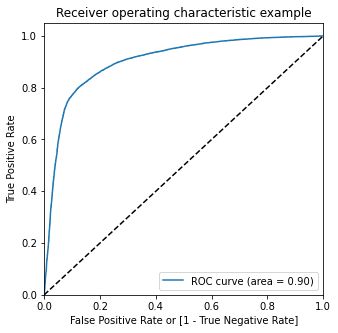

In [203]:
draw_roc(y_train_pred_final.Churn,y_train_pred_final['Churning_prob'])

- This curve is towards the upper-left corner, there is a larger area under the curve (AUC) indicating that the model 
is good. 

- The AUC score for train dataset is 0.90

- Our model has high sensitivity value but specificity value is relatively lower.
- So we need to find an optimum cut-off to have a good balance between these two

#### Finding Optimal Cut-off Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [204]:
# Let's create columns with different probability cutoffs 

In [205]:
number = [float(x/10) for x in range(10)]

for i in number:
    y_train_pred_final[i] = y_train_pred_final['Churning_prob'].apply(lambda j: 1 if j>i else 0)
    
y_train_pred_final.head()

,Churn,Churning_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.020115,0,1,0,0,0,0,0,0,0,0,0
1,0,0.221797,0,1,1,1,0,0,0,0,0,0,0
2,0,0.000894,0,1,0,0,0,0,0,0,0,0,0
3,0,0.687085,1,1,1,1,1,1,1,1,0,0,0
4,0,0.037374,0,1,0,0,0,0,0,0,0,0,0


In [206]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

In [207]:
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

for i in number:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/ total1 #TN+TP/TOTAL
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    cutoff_df.loc[i] = [i,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.693951  0.973511  0.414390
0.2   0.2  0.751672  0.948059  0.555285
0.3   0.3  0.790602  0.922969  0.658234
0.4   0.4  0.817765  0.896688  0.738842
0.5   0.5  0.832513  0.855166  0.809860
0.6   0.6  0.837956  0.807423  0.868488
0.7   0.7  0.832279  0.750868  0.913690
0.8   0.8  0.772096  0.594889  0.949303
0.9   0.9  0.601472  0.219688  0.983256


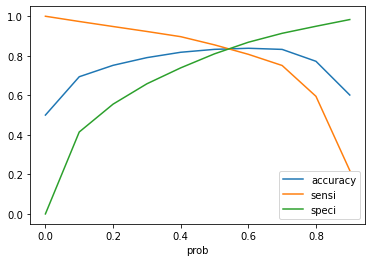

In [208]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x= 'prob',y =['accuracy','sensi','speci'])
plt.show()

- Our initial probability cutoff was 0.5
- But From the curve above, we can see that the optimum point is above 0.5 but less than 0.6
- So let's plot the same for values between 0.5 and 0.6

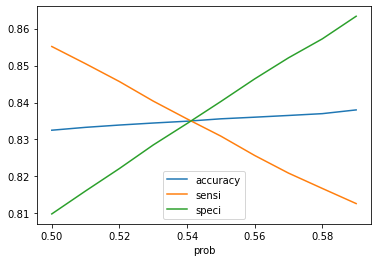

In [209]:
number=[0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in number:
    y_train_pred_final[i] = y_train_pred_final['Churning_prob'].apply(lambda j: 1 if j>i else 0)
    
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

for i in number:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/ total1 #TN+TP/TOTAL
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    cutoff_df.loc[i] = [i,accuracy,sensi,speci]
    
cutoff_df.plot.line(x= 'prob',y =['accuracy','sensi','speci'])
plt.show()

In [210]:
cutoff_df

,prob,accuracy,sensi,speci
0.50,0.50,0.832513,0.855166,0.809860
0.51,0.51,0.833290,0.850500,0.816080
0.52,0.52,0.833912,0.845679,0.822145
0.53,0.53,0.834456,0.840392,0.828521
0.54,0.54,0.834949,0.835571,0.834327
0.55,0.55,0.835597,0.830906,0.840288
0.56,0.56,0.836038,0.825670,0.846405
0.57,0.57,0.836504,0.820901,0.852107
0.58,0.58,0.836997,0.816754,0.857239
0.59,0.59,0.838007,0.812659,0.863356


From the curve above, 0.54 is the optimum point to take it as a cutoff probability.

In [211]:
# final prediction using cutoff of 0.54
y_train_pred_final['final_predicted'] = y_train_pred_final['Churning_prob'].apply(lambda x: 1 if x>0.54 else 0)

In [212]:
y_train_pred_final.head()

,Churn,Churning_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_predicted
0,0,0.020115,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.221797,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.000894,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.687085,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1
4,0,0.037374,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [213]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.final_predicted)

0.83494893992017

- The overall accuracy of the logistic model now is 83.49%

In [214]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.final_predicted)

In [215]:
confusion2

array([[16095,  3196],
       [ 3172, 16119]], dtype=int64)

In [216]:
TP = confusion2[1,1] # True positive
TN = confusion2[0,0] # True negative
FP = confusion2[0,1] # False positive
FN = confusion2[1,0] # False negative

In [217]:
# Let's see the sensitivity of our logistic regression model
TP/float(TP+ FN)

0.8355709916541393

In [218]:
# Let us calculate specificity
TN/float(TN+FP)

0.8343268881862008

- Earlier with 0.5 cut-off
    - accuracy: 83.25%
    - sensitivity : 85.52%
    - specificity : 80.99%
- After choosing the optimum cut-off at 0.54
    - accuracy : 83.49%
    - sensitivity : 83.56%
    - specificity : 83.43%

In [219]:
# Calculating false postive rate
FP/float(TN+FP)

0.16567311181379918

In [220]:
# Positive predictive value 
TP/float(TP+FP)

0.8345327465700233

In [221]:
# Negative predictive value
TN/float(TN+FN)

0.8353661701354648

#### Model Evaluation: Precision and Recall

In [222]:
from sklearn.metrics import precision_score, recall_score

In [223]:
# Precision Score
precision_score(y_train_pred_final.Churn,y_train_pred_final.final_predicted)

0.8345327465700233

In [224]:
# Recall Score
recall_score(y_train_pred_final.Churn,y_train_pred_final.final_predicted)

0.8355709916541393

- Our model has good Precision and Recall values

In [225]:
### Precision and recall tradeoff

In [226]:
from sklearn.metrics import precision_recall_curve

In [227]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churning_prob)

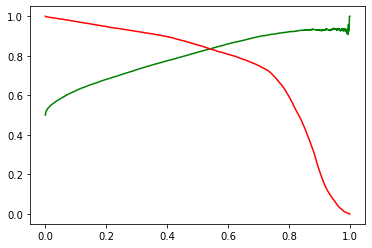

In [228]:
plt.plot(thresholds,p[:-1],'g-')
plt.plot(thresholds,r[:-1],'r-')
plt.show()

- Optimum cut off seems to be between 0.5 and 0.6 from precision- recall view 

####  Making predictions on the test set

In [229]:
X_test.shape

(9001, 81)

In [230]:
# Applying scaler() to continuous variables 
X_test[num_col]= scaler.transform(X_test[num_col])
X_test.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,total_arpu,total_vol_3g,total_data_rech_amt_8,arpu_avg_6_7,onnet_mou_avg_6_7,offnet_mou_avg_6_7,roam_ic_mou_avg_6_7,roam_og_mou_avg_6_7,loc_og_t2t_mou_avg_6_7,loc_og_t2m_mou_avg_6_7,loc_og_t2f_mou_avg_6_7,loc_og_t2c_mou_avg_6_7,std_og_t2t_mou_avg_6_7,std_og_t2m_mou_avg_6_7,std_og_t2f_mou_avg_6_7,isd_og_mou_avg_6_7,spl_og_mou_avg_6_7,og_others_avg_6_7,loc_ic_t2t_mou_avg_6_7,loc_ic_t2m_mou_avg_6_7,loc_ic_t2f_mou_avg_6_7,std_ic_t2t_mou_avg_6_7,std_ic_t2m_mou_avg_6_7,std_ic_t2f_mou_avg_6_7,spl_ic_mou_avg_6_7,isd_ic_mou_avg_6_7,ic_others_avg_6_7,total_rech_num_avg_6_7,total_rech_amt_avg_6_7,max_rech_amt_avg_6_7,last_day_rch_amt_avg_6_7,total_rech_data_avg_6_7,max_rech_data_avg_6_7,av_rech_amt_data_avg_6_7,vol_2g_mb_avg_6_7,vol_3g_mb_avg_6_7,monthly_2g_avg_6_7,sachet_2g_avg_6_7,monthly_3g_avg_6_7,sachet_3g_avg_6_7,vbc_3g_avg_6_7,total_data_rech_amt_avg_6_7
45591,0.044453,0.010877,0.010310,0.000000,0.000000,0.010877,0.028821,0.000000,0.004648,0.000000,0.000000,0.0,0.0,0.005584,0.0,0.080083,0.032945,0.016899,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.224490,0.014960,0.022477,0.006743,0.166667,0.016077,0.080386,0.015279,0.001966,0.0,0.181818,0.0,0.04878,0.207679,0.004652,0.009294,0.001986,0.029685,0.029961,0.003534,0.003058,0.000000,0.000000,0.005066,0.003320,0.001127,0.015324,0.000000,0.000000,0.0,0.0,0.011000,0.006953,0.020669,0.025994,0.003062,0.000170,0.000000,0.000000,0.000000,0.000000,0.000000,0.135484,0.006408,0.006366,0.006774,0.137615,0.013505,0.036519,0.032202,0.001928,0.0,0.148649,0.000000,0.075472,0.000000,0.028196
88300,0.042137,0.040040,0.027009,0.000000,0.000000,0.040040,0.073077,0.000388,0.020207,0.000000,0.000000,0.0,0.0,0.016134,0.0,0.005006,0.052876,0.071653,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.076531,0.012467,0.022027,0.009890,0.016667,0.063023,0.031511,0.000330,0.004188,0.0,0.022727,0.0,0.00000,0.186428,0.006653,0.017843,0.008121,0.001164,0.043990,0.091492,0.066207,0.000000,0.000000,0.131180,0.108010,0.006188,0.000000,0.000000,0.000000,0.0,0.0,0.002363,0.000000,0.003868,0.089714,0.065093,0.000000,0.000000,0.000000,0.002408,0.000000,0.000000,0.080645,0.020099,0.036375,0.012903,0.018349,0.063023,0.021756,0.000224,0.010487,0.0,0.027027,0.000000,0.000000,0.008821,0.001735
51434,0.042908,0.006151,0.058906,0.000242,0.000309,0.005657,0.006285,0.000000,0.007747,0.000491,0.053461,0.0,0.0,0.055484,0.0,0.008646,0.011485,0.003169,0.00049,0.014636,0.000000,0.0,0.000000,0.0,0.045918,0.015622,0.028771,0.025624,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.336151,0.000000,0.011939,0.004373,0.000000,0.034745,0.009318,0.042261,0.007015,0.013161,0.010816,0.012292,0.000000,0.002913,0.000393,0.034556,0.0,0.0,0.010105,0.000000,0.003841,0.006525,0.000512,0.000691,0.007289,0.000000,0.000000,0.000000,0.000000,0.029032,0.010182,0.038800,0.033548,0.018349,0.063023,0.021756,0.012900,0.007171,0.0,0.027027,0.000000,0.000000,0.000000,0.001735
81837,0.028191,0.000000,0.000623,0.000000,0.000000,0.000000,0.000500,0.006721,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000425,0.000000,0.000367,0.00000,0.000000,0.008359,0.0,0.000000,0.0,0.005102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.015455,0.002048,0.006124,0.023324,0.000000,0.033932,0.000217,0.000985,0.000000,0.000000,0.000311,0.000573,0.006153,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000016,0.000150,0.000674,0.000000,0.000000,0.000

In [231]:
X_test_sm = sm.add_constant(X_test[col])

Making predictions on the test set

In [232]:
y_test_pred = lgm4.predict(X_test_sm)

In [233]:
y_test_pred[:10]

45591    0.000662
88300    0.032038
51434    0.199755
81837    0.863779
82750    0.050004
42338    0.102867
69253    0.046251
36237    0.038983
22116    0.464120
26540    0.250329
dtype: float64

In [234]:
# Converting y_test_pred(which is an array) to a dataframe 
y_test_pred_df = pd.DataFrame(y_test_pred)
y_test_pred_df.head()

,0
45591,0.000662
88300,0.032038
51434,0.199755
81837,0.863779
82750,0.050004


In [235]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
45591,0
88300,0
51434,0
81837,0
82750,0


In [236]:
#appending both
y_test_pred_final = pd.concat([y_test_df,y_test_pred_df],axis=1)
y_test_pred_final = y_test_pred_final.rename(columns = {0:'Churning_prob'})
y_test_pred_final.head()

,churn,Churning_prob
45591,0,0.000662
88300,0,0.032038
51434,0,0.199755
81837,0,0.863779
82750,0,0.050004


In [237]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Churning_prob.apply(lambda x: 1 if x> 0.54 else 0)


In [238]:
y_test_pred_final.head()

,churn,Churning_prob,final_predicted
45591,0,0.000662,0
88300,0,0.032038,0
51434,0,0.199755,0
81837,0,0.863779,1
82750,0,0.050004,0


In [239]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.churn,y_test_pred_final.final_predicted)

0.8251305410509944

- Our model has an accuracy of ~82.51% on the test set

In [240]:
# let's have a look at the confusion matrix
confusion3 = metrics.confusion_matrix(y_test_pred_final.churn, y_test_pred_final.final_predicted)
confusion3 

array([[6856, 1413],
       [ 161,  571]], dtype=int64)

In [241]:
TP = confusion3[1,1] 
TN = confusion3[0,0]
FP = confusion3[0,1]
FN = confusion3[1,0]

In [242]:
# Let's see the sensitivity of our logistic regression model on test set
TP/(TP+FN)

0.7800546448087432

In [243]:
# Let us calculate specificity of our logistic regression model on test set
TN/(TN+FP)

0.8291208126738421

In [244]:
### ROC CURVE for test set

In [245]:
fpr,tpr,thresholds = metrics.roc_curve(y_test_pred_final.churn,y_test_pred_final['Churning_prob'],drop_intermediate= False)

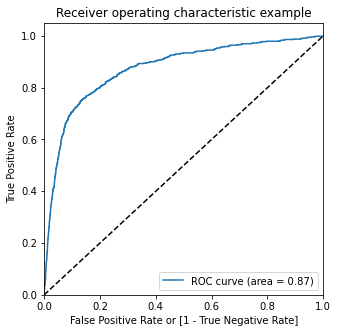

In [246]:
draw_roc(y_test_pred_final.churn,y_test_pred_final['Churning_prob'])

In [247]:
(metrics.roc_auc_score(y_test_pred_final.churn,y_test_pred_final['Churning_prob'])).round(2)

0.87

Model performance
- On the train set
    - accuracy : 83.49%
    - sensitivity : 83.56%
    - specificity : 83.43%
- On the test set Model's
    - accuracy : 82.51%
    - sensitivity : 78%
    - specificity : 82.91%


The AUC score =  0.87. <br>

This model is a good model


# PCA

- Let's perform pca to select few variables which would explain most of the variations in our data

In [248]:
X.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,total_arpu,total_vol_3g,total_data_rech_amt_8,arpu_avg_6_7,onnet_mou_avg_6_7,offnet_mou_avg_6_7,roam_ic_mou_avg_6_7,roam_og_mou_avg_6_7,loc_og_t2t_mou_avg_6_7,loc_og_t2m_mou_avg_6_7,loc_og_t2f_mou_avg_6_7,loc_og_t2c_mou_avg_6_7,std_og_t2t_mou_avg_6_7,std_og_t2m_mou_avg_6_7,std_og_t2f_mou_avg_6_7,isd_og_mou_avg_6_7,spl_og_mou_avg_6_7,og_others_avg_6_7,loc_ic_t2t_mou_avg_6_7,loc_ic_t2m_mou_avg_6_7,loc_ic_t2f_mou_avg_6_7,std_ic_t2t_mou_avg_6_7,std_ic_t2m_mou_avg_6_7,std_ic_t2f_mou_avg_6_7,spl_ic_mou_avg_6_7,isd_ic_mou_avg_6_7,ic_others_avg_6_7,total_rech_num_avg_6_7,total_rech_amt_avg_6_7,max_rech_amt_avg_6_7,last_day_rch_amt_avg_6_7,total_rech_data_avg_6_7,max_rech_data_avg_6_7,av_rech_amt_data_avg_6_7,vol_2g_mb_avg_6_7,vol_3g_mb_avg_6_7,monthly_2g_avg_6_7,sachet_2g_avg_6_7,monthly_3g_avg_6_7,sachet_3g_avg_6_7,vbc_3g_avg_6_7,total_data_rech_amt_avg_6_7
0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.16,4.13,1.15,0.00,0.00,0.00,0.0,0.00,0.00,2,252,252,252,1.0,252.0,252.0,5.75,109.61,0,0,1,0,968,30.40,626.004,343.94,252.0,206.1005,33.32,94.0225,0.00,0.000,11.760,40.730,0.000,0.0,0.000,3.7925,0.00,0.000,0.00,0.0,15.715,56.785,0.905,0.000,2.035,0.000,0.000,0.000,0.000,3.5,307.0,252.0,252.0,1.0,252.0,252.0,15.725,117.165,0.0,0.0,1.0,0.0,50.600,252.0
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,12.01,49.14,16.68,10.01,6.50,0.0,27.31,121.19,39.53,30.39,141.33,22.21,0.0,31.59,15.14,7,3638,1580,779,0.0,0.0,0.0,0.00,0.00,0,0,0,0,802,57.74,5590.510,0.00,0.0,1209.5150,56.26,510.2950,24.86,18.165,41.385,378.005,58.635,0.0,13.795,40.8250,13.37,0.090,2.25,0.0,45.200,219.525,126.810,24.360,109.215,43.215,0.105,8.295,15.465,5.0,1185.0,1185.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,19.060,0.0
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,22.58,75.69,0.00,0.00,10.23,0.0,0.31,15.48,0.00,0.10,0.65,0.00,0.0,0.00,0.00,14,120,30,10,3.0,23.0,69.0,0.03,11.94,0,3,0,0,315,21.03,1008.306,762.89,207.0,435.4720,382.36,87.6450,0.00,0.000,257.360,75.770,0.000,0.0,124.995,11.8650,0.00,0.000,0.00,0.0,16.840,35.780,0.000,0.290,13.255,0.000,0.000,0.000,0.000,20.0,519.0,122.0,25.0,1.0,77.0,88.5,178.000,375.475,0.5,0.5,0.0,0.0,516.405,177.0
21,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,61.79,876.99,0.00,0.00,0.00,0.0,19.54,129.16,10.39,0.18,101.74,0.00,0.0,0.00,0.00,27,718,50,50,0.0,0.0,0.0,0.00,0.00,0,0,0,0,720,0.00,1749.966,0.00,0.0,556.1030,117.26,827.3050,0.00,0.000,5.320,89.870,0.375,0.0,111.935,737.0500,0.00,0.000,0.00,0.0,6.335,96.430,3.725,10.020,52.960,0.000,0.000,0.000,0.000,24.0,640.0,50.0,25.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0
23,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,0.00,39.61,0.00,0.00,17.71,0.0,76.64,146.84,0.71,13.38,43.91,0.00,0.0,3.74,13.06,4,439,179,0,2.0,179.0,270.0,0.01,1009.92,0,0,1,1,604,40.45,635.213,1609.01,540.0,134.1235,49.81,87.3850,0.00,0.000,49.810,82.975,0.000,0.0,0.000,4.3550,0.00,0.005,0.05,0.0,40.875,104.635,0.000,0.255,8.660,0.000,0.000,14.115,2.675,4.0,227.0,89.5,89.5,1.0,89.5,178.0,0.240,299.545,0.0,0.0,1.0,0.0,25.930,356.0


In [249]:
###  normalize all the fields by Minmax scaling

In [250]:
scaler = MinMaxScaler()

In [251]:
X_scaled= scaler.fit_transform(X[num_col])
X_scaled_final = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_final.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,total_arpu,total_vol_3g,total_data_rech_amt_8,arpu_avg_6_7,onnet_mou_avg_6_7,offnet_mou_avg_6_7,roam_ic_mou_avg_6_7,roam_og_mou_avg_6_7,loc_og_t2t_mou_avg_6_7,loc_og_t2m_mou_avg_6_7,loc_og_t2f_mou_avg_6_7,loc_og_t2c_mou_avg_6_7,std_og_t2t_mou_avg_6_7,std_og_t2m_mou_avg_6_7,std_og_t2f_mou_avg_6_7,isd_og_mou_avg_6_7,spl_og_mou_avg_6_7,og_others_avg_6_7,loc_ic_t2t_mou_avg_6_7,loc_ic_t2m_mou_avg_6_7,loc_ic_t2f_mou_avg_6_7,std_ic_t2t_mou_avg_6_7,std_ic_t2m_mou_avg_6_7,std_ic_t2f_mou_avg_6_7,spl_ic_mou_avg_6_7,isd_ic_mou_avg_6_7,ic_others_avg_6_7,total_rech_num_avg_6_7,total_rech_amt_avg_6_7,max_rech_amt_avg_6_7,last_day_rch_amt_avg_6_7,total_rech_data_avg_6_7,max_rech_data_avg_6_7,av_rech_amt_data_avg_6_7,vol_2g_mb_avg_6_7,vol_3g_mb_avg_6_7,monthly_2g_avg_6_7,sachet_2g_avg_6_7,monthly_3g_avg_6_7,sachet_3g_avg_6_7,vbc_3g_avg_6_7,total_data_rech_amt_avg_6_7
0,0.033622,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000040,0.000889,0.000724,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.010204,0.005560,0.056642,0.056642,0.016667,0.162058,0.062054,5.171975e-04,0.003649,0.0,0.000000,0.0625,0.00000,0.190292,0.002354,0.005238,0.003327,0.002828,0.029697,0.004545,0.011308,0.000000,0.000000,0.001979,0.009814,0.000000,0.0,0.000000,0.000483,0.000000,0.000000e+00,0.000000,0.0,0.002749,0.012811,0.000666,0.000000,0.000652,0.000000,0.000000,0.000000,0.000000,0.019355,0.008130,0.076387,0.081290,0.018349,0.162058,0.049003,0.001981,0.003195,0.000000,0.000000,0.086957,0.0,0.006178,0.004462
1,0.119378,0.004863,0.023267,0.007588,0.007131,0.003746,0.032709,0.057330,0.000000,0.001499,0.003523,0.032269,0.001762,0.006810,0.0,0.006822,0.026099,0.024885,0.007052,0.025033,0.015922,0.0,0.009202,0.012514,0.035714,0.080274,0.355136,0.175096,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.0000,0.00000,0.150205,0.004470,0.056791,0.000000,0.000000,0.060870,0.007674,0.061372,0.008123,0.007535,0.006965,0.091082,0.044046,0.0,0.001888,0.005196,0.034916,1.580203e-05,0.001966,0.0,0.007907,0.049524,0.093350,0.004327,0.034976,0.036467,0.006321,0.001468,0.010891,0.029032,0.031380,0.359200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.002327,0.000000
2,0.031406,0.003262,0.009743,0.000000,0.000000,0.001162,0.010187,0.000000,0.020322,0.002817,0.005426,0.000000,0.000000,0.010718,0.0,0.000077,0.003334,0.000000,0.000023,0.000115,0.000000,0.0,0.000000,0.000000,0.071429,0.002648,0.006743,0.002248,0.050000,0.014791,0.016991,2.698422e-06,0.000398,0.0,0.068182,0.0000,0.00000,0.032601,0.001628,0.009208,0.007380,0.002323,0.036823,0.052156,0.010541,0.000000,0.000000,0.043315,0.018257,0.000000,0.0,0.017104,0.001510,0.000000,0.000000e+00,0.000000,0.0,0.002946,0.008072,0.000000,0.000052,0.004245,0.000000,0.000000,0.000000,0.000000,0.125806,0.013744,0.036981,0.008065,0.018349,0.049518,0.017210,0.022421,0.010240,0.111111,0.013158,0.000000,0.0,0.063049,0.003134
3,0.045915,0.007918,0.070205,0.000000,0.000000,0.002171,0.021125,0.001702,0.000000,0.007710,0.062866,0.000000,0.000000,0.000000,0.0,0.004881,0.027815,0.006541,0.000042,0.018020,0.000000,0.0,0.000000,0.000000,0.137755,0.015843,0.011238,0.011238,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.0000,0.00000,0.130403,0.000000,0.016909,0.000000,0.000000,0.040570,0.015995,0.099498,0.000000,0.000000,0.000895,0.021655,0.000282,0.0,0.015317,0.

In [252]:
#importing pca
from sklearn.decomposition import PCA

In [253]:
# fitting on scaled data
pca = PCA(random_state=42)
pca.fit(X_scaled)

PCA(random_state=42)

In [268]:
pca_components=pca.components_
pca_components.shape

(81, 81)

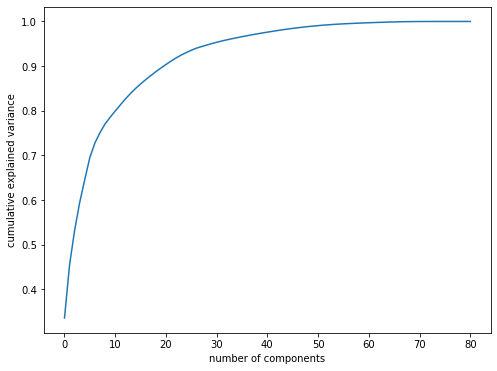

In [263]:
# plotting cumilative explained variance against the number of variables
plt.figure(figsize = (8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [269]:
# cumilative explained variance ratio
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 33.6 ,  45.5 ,  53.24,  59.48,  64.61,  69.55,  72.8 ,  75.11,
        77.04,  78.55,  79.94,  81.31,  82.64,  83.86,  84.99,  86.01,
        86.96,  87.87,  88.75,  89.58,  90.37,  91.13,  91.85,  92.49,
        93.05,  93.57,  94.03,  94.38,  94.71,  95.04,  95.35,  95.63,
        95.9 ,  96.14,  96.37,  96.6 ,  96.82,  97.04,  97.24,  97.43,
        97.62,  97.8 ,  97.98,  98.15,  98.31,  98.47,  98.61,  98.74,
        98.86,  98.98,  99.08,  99.18,  99.26,  99.34,  99.41,  99.48,
        99.54,  99.59,  99.64,  99.69,  99.73,  99.77,  99.81,  99.85,
        99.88,  99.91,  99.94,  99.96,  99.98, 100.  , 100.01, 100.01,
       100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01,
       100.01])

- From the plot and data above it is clear that 30 components are good enough to explain 95% of the variance in data

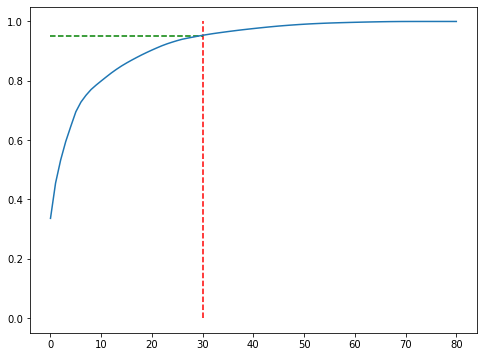

In [270]:
# plotting cumilative explained variance against the number of variables 
fig = plt.figure(figsize=[8,6])
plt.vlines(x=30, ymax=1, ymin=0, colors="r", linestyles="--") # vertical line at 30 components
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--") # horizontal line at 95 cumilative variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))

- 30 components are enough to describe 95% of the variance in the dataset.
- So we will consider 30 components for modelling

In [273]:
# Let's have a look at 30 principal components
for row in range(30):
    # getting the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sorting the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # printing the top 4 feature names of each component
    print(f'Component {row}: {X_scaled_final.columns[indices].to_list()}')

Component 0: ['aon', 'loc_og_t2m_mou_avg_6_7', 'loc_og_t2m_mou_8', 'max_rech_amt_avg_6_7']
Component 1: ['max_rech_data_8', 'max_rech_data_avg_6_7', 'monthly_2g_avg_6_7', 'monthly_2g_8']
Component 2: ['sachet_2g_avg_6_7', 'sachet_2g_8', 'total_rech_data_avg_6_7', 'total_rech_data_8']
Component 3: ['monthly_3g_avg_6_7', 'monthly_3g_8', 'max_rech_data_8', 'av_rech_amt_data_8']
Component 4: ['onnet_mou_avg_6_7', 'std_og_t2t_mou_avg_6_7', 'std_og_t2t_mou_8', 'onnet_mou_8']
Component 5: ['loc_og_t2m_mou_avg_6_7', 'offnet_mou_avg_6_7', 'loc_og_t2m_mou_8', 'loc_ic_t2m_mou_avg_6_7']
Component 6: ['std_og_t2m_mou_avg_6_7', 'offnet_mou_avg_6_7', 'std_og_t2m_mou_8', 'offnet_mou_8']
Component 7: ['max_rech_amt_avg_6_7', 'max_rech_amt_8', 'last_day_rch_amt_avg_6_7', 'last_day_rch_amt_8']
Component 8: ['monthly_2g_8', 'max_rech_data_8', 'av_rech_amt_data_8', 'total_rech_num_8']
Component 9: ['loc_ic_t2t_mou_8', 'loc_og_t2t_mou_avg_6_7', 'loc_ic_t2t_mou_avg_6_7', 'loc_og_t2t_mou_8']
Component 10: ['t

In [630]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X_scaled_final,y,train_size = 0.7,test_size = 0.3 ,random_state=100)

In [631]:
X_train.shape,X_test.shape

((21000, 81), (9001, 81))

In [632]:
# handling imbalance with smote
# instantiating smote
smote = SMOTE(random_state=42)

In [633]:
X_tr,y_tr = smote.fit_sample(X_train,y_train)

In [634]:
# importing IncrementalPCA
from sklearn.decomposition import IncrementalPCA

In [635]:
# instantiating IncrementalPCA with n_components as 30
pca = IncrementalPCA(n_components=30)

In [636]:
#fitting on data
X_tr_pca = pca.fit_transform(X_tr)
X_test_pca = pca.transform(X_test)

In [637]:
# shape of train before PCA
X_tr.shape

(38618, 81)

In [638]:
#Shape of train datatset after PCA
X_tr_pca.shape,

((38618, 30),)

In [639]:
X_test_pca.shape

(9001, 30)

In [640]:
X_train.shape

(21000, 81)

- For further analysis,let's select X_tr_pca and y_tr as our new training sets, as we are planning to go ahead with 30 feature variables which would explain 95% of the variance in data and a smote performed response variable.
- For testing models, let's use x_test_pca with selected 30 components.


In [641]:
X_train = X_tr_pca
X_test = X_test_pca
y_train = y_tr


## Building a logistic model using selected 30 components

In [642]:
#instantiating losgistic regression
logm = LogisticRegression()

In [643]:
X_train.shape

(38618, 30)

In [644]:
# fitting on data
logm5 = logm.fit(X_train,y_train)

#### Making predictions on test set

In [645]:
pred_probs_test = logm5.predict_proba(X_test)[:,1]

In [646]:
pred_probs_test

array([0.71230086, 0.56790395, 0.12889947, ..., 0.00302598, 0.6202422 ,
       0.09921604])

In [647]:
# auc score of model
(metrics.roc_auc_score(y_test, pred_probs_test)).round(2)

0.87

- From PCA we found that 30 components are enough to describe 95% of variance in our dataset.
- Then we took care of imbalance in the data set with the help of SMOTE
- We performed IncrementalPCA and reduced the shape of X_train set from (38618, 81) to (38618, 30) as we decided to go with 30 components which would escribe 95% of variance in our dataset.
- We formed our fifth logistic regression model which has an auc score of 0.87 (good model)

In [648]:
y_pred = logm5.predict(X_test)

In [649]:
y_pred

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [650]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)

[[6651 1600]
 [ 139  611]]


In [651]:
# confusion matrix

##predicted     not churned     churned
##actual

#not churned     6651           1600

#churned         139            611

In [652]:
TP = confusion[1,1] #true positive
TN = confusion[0,0] #true negative
FP = confusion[0,1] #false positive
FN = confusion[1,0] #flase negative

In [653]:
metrics.accuracy_score(y_test, y_pred)

0.8067992445283857

In [654]:
# Let's see the sensitivity of our logistic regression model
TP/(TP+FN)

0.8146666666666667

In [655]:
# Let us calculate specificity
TN/(TN+FP)

0.8060841110168464

- Our model has sensitivity of 81.47% and specificity around 80.6%
- Model is able to correctly predict 81.47% of the churned labels
- Model is able to correctly predict 80.6% of the not churned labels 

#### Making predictions on the train set

In [656]:
pred_probs_train = logm5.predict_proba(X_train)[:,1]

In [657]:
# auc score
(metrics.roc_auc_score(y_train, pred_probs_train)).round(2)

0.89

In [658]:
##Confusion matrix, Sensitivity and Specificity

In [659]:
y_train_pred = logm5.predict(X_train)

In [660]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[15367  3942]
 [ 2948 16361]]


In [661]:
TP = confusion[1,1] #true positive
TN = confusion[0,0] #true negative
FP = confusion[0,1] #false positive
FN = confusion[1,0] #flase negative

In [662]:
metrics.accuracy_score(y_train, y_train_pred)

0.8215857890103061

In [663]:
# Let's see the sensitivity of our logistic regression model
TP/(TP+FN)

0.8473250815681806

In [664]:
# Let us calculate specificity
TN/(TN+FP)

0.7958464964524316

# Random FOREST with PCA

In [721]:
df.shape

(30001, 82)

In [722]:
X.shape,y.shape

((30001, 81), (30001,))

In [723]:
X_scaled_final.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,total_arpu,total_vol_3g,total_data_rech_amt_8,arpu_avg_6_7,onnet_mou_avg_6_7,offnet_mou_avg_6_7,roam_ic_mou_avg_6_7,roam_og_mou_avg_6_7,loc_og_t2t_mou_avg_6_7,loc_og_t2m_mou_avg_6_7,loc_og_t2f_mou_avg_6_7,loc_og_t2c_mou_avg_6_7,std_og_t2t_mou_avg_6_7,std_og_t2m_mou_avg_6_7,std_og_t2f_mou_avg_6_7,isd_og_mou_avg_6_7,spl_og_mou_avg_6_7,og_others_avg_6_7,loc_ic_t2t_mou_avg_6_7,loc_ic_t2m_mou_avg_6_7,loc_ic_t2f_mou_avg_6_7,std_ic_t2t_mou_avg_6_7,std_ic_t2m_mou_avg_6_7,std_ic_t2f_mou_avg_6_7,spl_ic_mou_avg_6_7,isd_ic_mou_avg_6_7,ic_others_avg_6_7,total_rech_num_avg_6_7,total_rech_amt_avg_6_7,max_rech_amt_avg_6_7,last_day_rch_amt_avg_6_7,total_rech_data_avg_6_7,max_rech_data_avg_6_7,av_rech_amt_data_avg_6_7,vol_2g_mb_avg_6_7,vol_3g_mb_avg_6_7,monthly_2g_avg_6_7,sachet_2g_avg_6_7,monthly_3g_avg_6_7,sachet_3g_avg_6_7,vbc_3g_avg_6_7,total_data_rech_amt_avg_6_7
0,0.033622,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000040,0.000889,0.000724,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.010204,0.005560,0.056642,0.056642,0.016667,0.162058,0.062054,5.171975e-04,0.003649,0.0,0.000000,0.0625,0.00000,0.190292,0.002354,0.005238,0.003327,0.002828,0.029697,0.004545,0.011308,0.000000,0.000000,0.001979,0.009814,0.000000,0.0,0.000000,0.000483,0.000000,0.000000e+00,0.000000,0.0,0.002749,0.012811,0.000666,0.000000,0.000652,0.000000,0.000000,0.000000,0.000000,0.019355,0.008130,0.076387,0.081290,0.018349,0.162058,0.049003,0.001981,0.003195,0.000000,0.000000,0.086957,0.0,0.006178,0.004462
1,0.119378,0.004863,0.023267,0.007588,0.007131,0.003746,0.032709,0.057330,0.000000,0.001499,0.003523,0.032269,0.001762,0.006810,0.0,0.006822,0.026099,0.024885,0.007052,0.025033,0.015922,0.0,0.009202,0.012514,0.035714,0.080274,0.355136,0.175096,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.0000,0.00000,0.150205,0.004470,0.056791,0.000000,0.000000,0.060870,0.007674,0.061372,0.008123,0.007535,0.006965,0.091082,0.044046,0.0,0.001888,0.005196,0.034916,1.580203e-05,0.001966,0.0,0.007907,0.049524,0.093350,0.004327,0.034976,0.036467,0.006321,0.001468,0.010891,0.029032,0.031380,0.359200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.002327,0.000000
2,0.031406,0.003262,0.009743,0.000000,0.000000,0.001162,0.010187,0.000000,0.020322,0.002817,0.005426,0.000000,0.000000,0.010718,0.0,0.000077,0.003334,0.000000,0.000023,0.000115,0.000000,0.0,0.000000,0.000000,0.071429,0.002648,0.006743,0.002248,0.050000,0.014791,0.016991,2.698422e-06,0.000398,0.0,0.068182,0.0000,0.00000,0.032601,0.001628,0.009208,0.007380,0.002323,0.036823,0.052156,0.010541,0.000000,0.000000,0.043315,0.018257,0.000000,0.0,0.017104,0.001510,0.000000,0.000000e+00,0.000000,0.0,0.002946,0.008072,0.000000,0.000052,0.004245,0.000000,0.000000,0.000000,0.000000,0.125806,0.013744,0.036981,0.008065,0.018349,0.049518,0.017210,0.022421,0.010240,0.111111,0.013158,0.000000,0.0,0.063049,0.003134
3,0.045915,0.007918,0.070205,0.000000,0.000000,0.002171,0.021125,0.001702,0.000000,0.007710,0.062866,0.000000,0.000000,0.000000,0.0,0.004881,0.027815,0.006541,0.000042,0.018020,0.000000,0.0,0.000000,0.000000,0.137755,0.015843,0.011238,0.011238,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.0000,0.00000,0.130403,0.000000,0.016909,0.000000,0.000000,0.040570,0.015995,0.099498,0.000000,0.000000,0.000895,0.021655,0.000282,0.0,0.015317,0.

In [724]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X_scaled_final,y,train_size = 0.7,test_size = 0.3 ,random_state=100)

In [725]:
X_train.shape,X_test.shape

((21000, 81), (9001, 81))

In [726]:
y_train.shape,y_test.shape

((21000,), (9001,))

In [727]:
# handling imbalance with smote
# instantiating smote
smote = SMOTE(random_state=42)

In [728]:
# fitting on train data
X_train,y_train = smote.fit_sample(X_train,y_train)

In [729]:
X_train.shape,y_train.shape

((38618, 81), (38618,))

In [730]:
#instantiating incrementalpca
pca = IncrementalPCA(n_components=30)

In [731]:
#fitting on data
X_train = pca.fit_transform(X_train)
X_test  = pca.transform(X_test)

In [732]:
#Shape of train datatset after PCA
X_train.shape,y_train.shape

((38618, 30), (38618,))

In [733]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

In [734]:
#importing confusion_matrix and accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [735]:
rf = RandomForestClassifier(random_state=42,n_jobs=-1)

In [736]:
# fitting Random forest model with default hyperparameters

In [737]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [738]:
# prediction on test set
y_test_rf_pred = rf.predict(X_test)

In [739]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_rf_pred)
print(confusion)

[[7789  462]
 [ 340  410]]


In [685]:
#accuracy on test set
round(accuracy_score(y_test,y_test_rf_pred),2)

0.91

In [686]:
# recall score
round(recall_score(y_test,y_test_rf_pred),2)

0.55

In [687]:
# precision score
round(precision_score(y_test,y_test_rf_pred),2)

0.47

In [688]:
# auc score
round(metrics.roc_auc_score(y_test,y_test_rf_pred),2)

0.75

In [689]:
# f1 score
round(metrics.f1_score(y_test,y_test_rf_pred),2)

0.51

# Hyper parameter tuning

Hyperparameters are simply the parameters that we pass on to the learning algorithm to control the training of the model and estimate the model parameters. Hyperparameters are choices that the algorithm designer makes to ‘tune’ the behaviour of the learning algorithm. The choice of hyperparameters, therefore, has a lot of bearing on the final model produced by the learning algorithm.

For hyperparameter tuning,  grid search is an available tool in scikit-learn 


In [703]:
# importing GridSearchCV
from sklearn.model_selection import GridSearchCV

 - Let's tune hyperparameters one by one

In [704]:
# 'max_depth'

In [705]:
# providing  few values for max_depth
hyper_params = {'max_depth':[3,5,10,15,20,25,30]}

In [324]:
# gridsearching with different max_depth values
model_cv = GridSearchCV(estimator=rf,
                       param_grid=hyper_params,
                       verbose=1,
                       cv=5,
                       n_jobs=-1,
                       return_train_score=True)

In [325]:
# fiting the model
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1, param_grid={'max_depth': [3, 5, 10, 15, 20, 25, 30]},
             return_train_score=True, verbose=1)

In [326]:
# accuracy score of best model
model_cv.best_score_

0.9485990114874072

In [327]:
# estimators of best model
model_cv.best_estimator_

RandomForestClassifier(max_depth=30, n_jobs=-1, random_state=42)

In [328]:
cv_df = pd.DataFrame(model_cv.cv_results_)

In [329]:
# ordering the models based on their mean test score
cv_df.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
6,23.301412,5.330754,1.457163,0.936576,30,{'max_depth': 30},0.951709,0.946919,0.950544,0.946135,0.947689,0.948599,0.002153,1,0.998252,0.999126,0.998543,0.998770,0.998802,0.998699,0.000291
5,28.179448,1.809569,3.468906,0.706663,25,{'max_depth': 25},0.950155,0.945624,0.949508,0.947689,0.946005,0.947796,0.001813,2,0.995242,0.996083,0.995468,0.995566,0.995469,0.995566,0.000280
4,26.342174,1.866206,3.180707,0.573389,20,{'max_depth': 20},0.947307,0.942128,0.944847,0.942898,0.943545,0.944145,0.001815,3,0.988606,0.989771,0.988347,0.989351,0.989772,0.989170,0.000592
3,22.748976,2.552112,3.186008,0.578537,15,{'max_depth': 15},0.940057,0.933066,0.936691,0.934222,0.932669,0.935341,0.002743,4,0.976209,0.976597,0.975691,0.976145,0.976048,0.976138,0.000291
2,17.376813,0.652581,1.954797,0.493612,10,{'max_depth': 10},0.886717,0.889824,0.896427,0.887608,0.887479,0.889611,0.003562,5,0.917104,0.916068,0.918107,0.918466,0.916459,0.917241,0.000923
1,10.680490,1.274526,1.952834,1.819077,5,{'max_depth': 5},0.822631,0.829104,0.841274,0.827010,0.821701,0.828344,0.007019,6,0.832427,0.833495,0.829935,0.833015,0.834310,0.832636,0.001485
0,7.131160,2.018163,2.750059,0.490928,3,{'max_depth': 3},0.805153,0.811238,0.818099,0.810566,0.800207,0.809053,0.006039,7,0.814495,0.810708,0.806500,0.811782,0.813756,0.811448,0.002820


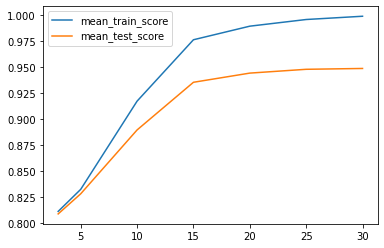

In [330]:
#plotting max_depth vs accuracy scores (for train and test sets)
plt.plot(cv_df.param_max_depth,cv_df.mean_train_score,label ='mean_train_score')
plt.plot(cv_df.param_max_depth,cv_df.mean_test_score,label = 'mean_test_score')
plt.legend(loc = 'best')


- As the value of max_depth increases the accuracy of model increases on both train and test sets till a point near 15 and then there is not much change in accuracy with increase in max_depth

In [331]:
# 'max_features'

In [332]:
# providing a range of values for max_features
# gridsearching and finding the accuracy score of the best model
hyper_params = {'max_features' : [3,5,7,11,25]}
model_cv = GridSearchCV(estimator=rf,
                       param_grid=hyper_params,
                       verbose=1,
                       cv=5,
                       n_jobs=-1,
                       return_train_score=True)
model_cv.fit(X_train,y_train)

model_cv.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


0.94854722484836

In [333]:
# ranking models with diff max_features values on the basis of test accuracy
cv_df = pd.DataFrame(model_cv.cv_results_)
cv_df.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
2,37.105704,0.946417,2.430212,0.246734,7,{'max_features': 7},0.952097,0.946919,0.949896,0.945746,0.948077,0.948547,0.002242,1,0.999968,1.0,1.0,1.0,1.0,0.999994,0.000013
0,19.401526,1.245899,2.380881,0.593671,3,{'max_features': 3},0.951579,0.946660,0.950155,0.945746,0.948336,0.948495,0.002155,2,1.000000,1.0,1.0,1.0,1.0,1.000000,0.000000
1,23.838195,0.493902,2.092337,1.560415,5,{'max_features': 5},0.950673,0.946142,0.951579,0.946005,0.947818,0.948444,0.002300,3,1.000000,1.0,1.0,1.0,1.0,1.000000,0.000000
3,57.294917,2.213293,3.630705,0.577279,11,{'max_features': 11},0.952745,0.944459,0.949896,0.945099,0.947430,0.947926,0.003078,4,1.000000,1.0,1.0,1.0,1.0,1.000000,0.000000
4,105.763971,15.053041,1.085891,0.771375,25,{'max_features': 25},0.947954,0.941352,0.948861,0.944063,0.942898,0.945026,0.002906,5,1.000000,1.0,1.0,1.0,1.0,1.000000,0.000000


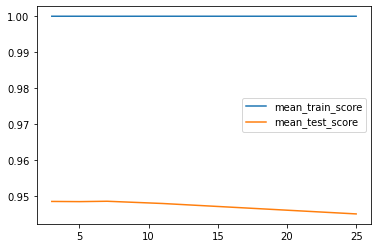

In [334]:
#plotting max_features vs accuracy scores (for train and test sets)
plt.plot(cv_df.param_max_features,cv_df.mean_train_score,label ='mean_train_score')
plt.plot(cv_df.param_max_features,cv_df.mean_test_score,label = 'mean_test_score')
plt.legend(loc = 'best')


- There is not much change in accuray of model on training set with different values of max_features
- But the test score decreases after some point around 7
- so let's consider max_feature values as 7

In [335]:
# 'min_samples_leaf'

In [706]:
# providing a range of values for min_samples_leaf
# gridsearching and finding the accuracy score of the best model
hyper_params = {'min_samples_leaf': [5,10,20,50,100,200]}
model_cv = GridSearchCV(estimator=rf,
                       param_grid=hyper_params,
                       verbose=1,
                       cv=5,
                       n_jobs=-1,
                       return_train_score=True)
model_cv.fit(X_train,y_train)

model_cv.best_score_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


0.9311978659318145

In [707]:
# ranking models with diff min_samples_leaf values on the basis of test accuracy
cv_df = pd.DataFrame(model_cv.cv_results_)
cv_df.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,25.684208,0.745778,0.841678,0.270366,5,{'min_samples_leaf': 5},0.927887,0.931124,0.935396,0.930079,0.931503,0.931198,0.002447,1,0.978604,0.979478,0.979219,0.979544,0.979738,0.979317,0.000393
1,23.539374,1.520067,1.608937,0.518363,10,{'min_samples_leaf': 10},0.908597,0.914682,0.920119,0.915188,0.914800,0.914677,0.003657,2,0.953745,0.955072,0.954166,0.954620,0.954394,0.954400,0.000444
2,22.836740,0.332452,0.761901,0.257448,20,{'min_samples_leaf': 20},0.883092,0.892413,0.903418,0.893306,0.889162,0.892278,0.006622,3,0.920211,0.921247,0.922056,0.922253,0.920052,0.921164,0.000909
3,19.066606,1.181836,0.679938,0.245006,50,{'min_samples_leaf': 50},0.854350,0.865484,0.875583,0.864560,0.858863,0.863768,0.007154,4,0.882728,0.881563,0.879782,0.880919,0.878751,0.880749,0.001381
4,17.016081,1.785185,0.915266,1.004146,100,{'min_samples_leaf': 100},0.839202,0.851502,0.857975,0.846562,0.840735,0.847195,0.006939,5,0.857934,0.857351,0.854341,0.855770,0.855349,0.856149,0.001318
5,12.536254,0.196912,0.397524,0.137112,200,{'min_samples_leaf': 200},0.828198,0.838296,0.845158,0.834909,0.827917,0.834895,0.006488,6,0.843886,0.842364,0.838448,0.840589,0.841334,0.841324,0.001814


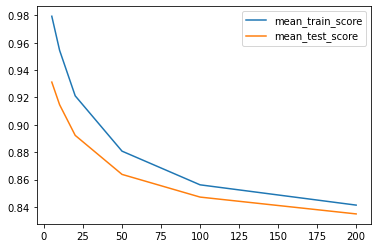

In [708]:
#plotting min_samples_leaf vs accuracy scores (for train and test sets)
plt.plot(cv_df.param_min_samples_leaf,cv_df.mean_train_score,label ='mean_train_score')
plt.plot(cv_df.param_min_samples_leaf,cv_df.mean_test_score,label = 'mean_test_score')
plt.legend(loc = 'best')

 - Model accuracy reduces with increase in min_samples_leaf
 - Model accuracy is maximum for lower min_samples_leaf values 
 - But we do not want the minimum number of samples required to be at a leaf node,to be very small, as that might lead to overfitting of data
 - We do not want very low accuracy as well 
 - So let's consider min_samples_leaf values as 5 and 10 hile fine tuning the yper parameters

In [339]:
# 'n_estimators'

In [340]:
# providing a range of values for n_estimators
# gridsearching and finding the accuracy score of the best model
hyper_params = {'n_estimators':[25,50,80,100,150,200]}
model_cv = GridSearchCV(estimator=rf,
                       param_grid=hyper_params,
                       verbose=1,
                       cv=5,
                       n_jobs=-1,
                       return_train_score=True)
model_cv.fit(X_train,y_train)

model_cv.best_score_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


0.9496089414731854

In [341]:
# ranking models with diff n_estimators values on the basis of test accuracy
cv_df = pd.DataFrame(model_cv.cv_results_)
cv_df.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
5,45.735510,8.555089,1.294287,0.968088,200,{'n_estimators': 200},0.951709,0.947048,0.951968,0.948336,0.948984,0.949609,0.001926,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,43.428070,1.199645,3.510383,0.614777,150,{'n_estimators': 150},0.951579,0.947048,0.951579,0.947689,0.949113,0.949402,0.001900,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,26.730420,0.844097,3.242853,0.459162,100,{'n_estimators': 100},0.950673,0.946142,0.951579,0.946005,0.947818,0.948444,0.002300,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,20.553202,1.275782,2.619470,0.448342,80,{'n_estimators': 80},0.950673,0.945883,0.951709,0.945617,0.948077,0.948392,0.002462,4,0.999968,1.000000,1.000000,1.000000,1.000000,0.999994,0.000013
1,12.281009,0.386832,3.068431,0.378083,50,{'n_estimators': 50},0.951062,0.945624,0.951191,0.947041,0.946782,0.948340,0.002325,5,0.999871,0.999968,1.000000,0.999935,0.999935,0.999942,0.000043
0,7.779029,0.822985,2.050647,0.147611,25,{'n_estimators': 25},0.948861,0.944718,0.947048,0.943675,0.941215,0.945103,0.002654,6,0.999514,0.999741,0.999741,0.999612,0.999644,0.999650,0.000085


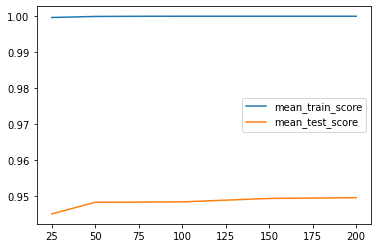

In [342]:
#plotting n_estimators vs accuracy scores (for train and test sets)
plt.plot(cv_df.param_n_estimators,cv_df.mean_train_score,label ='mean_train_score')
plt.plot(cv_df.param_n_estimators,cv_df.mean_test_score,label = 'mean_test_score')
plt.legend(loc = 'best')

- Test accuracy is very stable after n_estimators = 50,
- So let's use n_estimator as 50 or 80 while building the model

In [343]:
# 'min_samples_split'

In [344]:
# providing a range of values for min_samples_split
# gridsearching and finding the accuracy score of the best model
hyper_params = {'min_samples_split': [10,20,30,40,50,100]}
model_cv = GridSearchCV(estimator=rf,
                       param_grid=hyper_params,
                       verbose=1,
                       cv=5,
                       n_jobs=-1,
                       return_train_score=True)
model_cv.fit(X_train,y_train)

model_cv.best_score_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


0.9418664902492189

In [345]:
# ranking models with diff min_samples_split values on the basis of test accuracy
cv_df = pd.DataFrame(model_cv.cv_results_)
cv_df.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,31.489788,0.072510,1.013769,0.066437,10,{'min_samples_split': 10},0.940704,0.939798,0.944977,0.942250,0.941603,0.941866,0.001762,1,0.994692,0.995209,0.995371,0.995274,0.995339,0.995177,0.000249
1,31.105925,2.023507,1.866105,0.585865,20,{'min_samples_split': 20},0.926463,0.931383,0.934490,0.931374,0.932539,0.931250,0.002650,2,0.980611,0.981841,0.981226,0.981615,0.981389,0.981336,0.000418
2,30.611662,1.271485,1.506988,0.634746,30,{'min_samples_split': 30},0.915329,0.920766,0.928146,0.925159,0.921792,0.922238,0.004325,3,0.968343,0.969509,0.969250,0.969542,0.969089,0.969147,0.000435
3,29.358149,0.540344,2.526362,0.480788,40,{'min_samples_split': 40},0.907431,0.913387,0.919860,0.912728,0.913117,0.913305,0.003946,4,0.957111,0.958212,0.959312,0.957728,0.956789,0.957831,0.000889
4,28.942576,2.650707,1.784029,1.012108,50,{'min_samples_split': 50},0.899146,0.904842,0.915976,0.909491,0.905218,0.906935,0.005591,5,0.947077,0.947660,0.947563,0.948471,0.946464,0.947447,0.000665
5,24.589391,0.592554,0.837741,0.561329,100,{'min_samples_split': 100},0.873511,0.883868,0.898110,0.886184,0.880228,0.884380,0.008092,6,0.914126,0.914708,0.915712,0.914452,0.911410,0.914082,0.001437


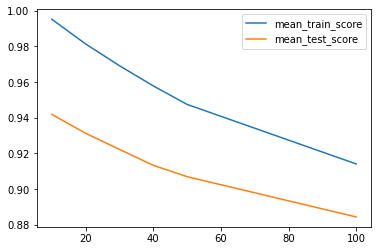

In [346]:
#plotting min_samples_split vs accuracy scores (for train and test sets)
plt.plot(cv_df.param_min_samples_split,cv_df.mean_train_score,label ='mean_train_score')
plt.plot(cv_df.param_min_samples_split,cv_df.mean_test_score,label = 'mean_test_score')
plt.legend(loc = 'best')

- accuracy is high at min_samples_split= 10
- let's consider 10-20 while fine tuning

# Grid search for fine tuning the hyperparameters

In [787]:
hyper_params = {'max_depth':[15,20],
               'max_features' : [7],
               'min_samples_leaf': [5,10],
               'n_estimators':[50,80],
               'min_samples_split': [10,20]}

In [788]:
%%time
model_cv = GridSearchCV(estimator=rf,
                       param_grid=hyper_params,
                       verbose=1,
                       cv=5,
                       n_jobs=-1,
                       return_train_score=True)
model_cv.fit(X_train,y_train)

model_cv.best_score_  # accuracy score of the best model

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Wall time: 3min 53s


0.9307059196828991

In [789]:
model_cv.best_estimator_ #  parameters of best model

RandomForestClassifier(max_depth=20, max_features=7, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=80, n_jobs=-1,
                       random_state=42)

In [790]:
cv_df = pd.DataFrame(model_cv.cv_results_)
cv_df.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
9,23.251657,0.646949,2.350178,0.212322,20,7,5,10,80,"{'max_depth': 20, 'max_features': 7, 'min_samp...",0.927110,0.930088,0.933713,0.929820,0.932798,0.930706,0.002346,1,0.974979,0.977374,0.976500,0.976307,0.976274,0.976287,0.000767
8,13.163769,1.467352,2.856052,0.688315,20,7,5,10,50,"{'max_depth': 20, 'max_features': 7, 'min_samp...",0.928146,0.929052,0.932807,0.930079,0.930467,0.930110,0.001573,2,0.974234,0.976565,0.975464,0.975983,0.975562,0.975562,0.000769
1,19.021864,0.313468,1.922363,0.544083,15,7,5,10,80,"{'max_depth': 15, 'max_features': 7, 'min_samp...",0.923356,0.926334,0.928664,0.924252,0.928396,0.926200,0.002135,3,0.965074,0.966466,0.965948,0.965755,0.966532,0.965955,0.000531
0,14.108100,0.904245,2.028819,0.133487,15,7,5,10,50,"{'max_depth': 15, 'max_features': 7, 'min_samp...",0.924003,0.923874,0.929700,0.922439,0.927619,0.925527,0.002697,4,0.964038,0.966434,0.964912,0.965561,0.965269,0.965243,0.000785
10,15.056234,0.578959,2.692512,0.354579,20,7,5,20,50,"{'max_depth': 20, 'max_features': 7, 'min_samp...",0.918954,0.922061,0.925686,0.923087,0.923475,0.922653,0.002195,5,0.962420,0.964394,0.963067,0.963619,0.963975,0.963495,0.000692


# Final Random forest model

In [803]:
# selecing final model as the one with best test accuracy
final_rf = model_cv.best_estimator_

In [804]:
#predictions on test set
y_pred_final_rf =final_rf.predict(X_test)

In [805]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred_final_rf)
print(confusion)

[[7632  619]
 [ 286  464]]


In [806]:
# model evaluation on test set
print('accuracy_score: ', round(accuracy_score(y_test,y_pred_final_rf),2))
print('recall_score: ',round(recall_score(y_test,y_pred_final_rf),2))
print('precision_score: ',round(precision_score(y_test,y_pred_final_rf),2))
print('auc_score: ',round(metrics.roc_auc_score(y_test,y_pred_final_rf),2))
print('f1_score: ',round(metrics.f1_score(y_test,y_pred_final_rf),2))

accuracy_score:  0.9
recall_score:  0.62
precision_score:  0.43
auc_score:  0.77
f1_score:  0.51


In [807]:
#predictions on train set
y_train_pred_final_rf =final_rf.predict(X_train)

In [808]:
# model evaluation on train set
print('accuracy_score: ', round(accuracy_score(y_train,y_train_pred_final_rf),2))
print('recall_score: ',round(recall_score(y_train,y_train_pred_final_rf),2))
print('precision_score: ',round(precision_score(y_train,y_train_pred_final_rf),2))
print('auc_score: ',round(metrics.roc_auc_score(y_train,y_train_pred_final_rf),2))
print('f1_score: ',round(metrics.f1_score(y_train,y_train_pred_final_rf),2))

accuracy_score:  0.98
recall_score:  0.99
precision_score:  0.96
auc_score:  0.98
f1_score:  0.98


## Conclusions and recommendations

 -  Among all the different types of models we made built, Random forest models seem to be the the better at predicting telecom churn.

 - Random RF model produces an accuracy of 0.91 in default overfit model and 0.9 on rf model with tuned hyper paramaters.

- From the pricipal components it is very clear that the age on network and the local outgoing calls to other operators(mou) can be used to predict customer churning well,So company should focus on these variables

- The 75th percentile of age on network of churned customers is 1039 days, which means is that among the people who have churned 75% of the them have left within first 3 yrs.
- The first three years are crucial for the retension of customers, so the operator needs to provide many offers during this period.

- The average of average revenue generated per user in 6 th and 7th months of churners were very high compared to non churners. Having an higher arpu_avg_6_7 means that the customer is a heavy user of the services provided.Since these individuals are paying alot , they are more likely to look for other services providers with cheaper prices/better offers. So in order to reduce churning the company needs to satsify the people with higher 'average revenue per user'.


- The telecom company should focus on total amount recharged in eighth month as it can be a  good indicator of churning
- So if the total amount recharged in eighth month is low, then there is very high chance that the customer will churn.

 - Among the churned customers the 2g/3g usage volume was very low, this could be because the signal is not good enough in certain places.So the company needs to provide better 3g/3g netowrk coverage in those areas.